In [114]:
import pandas as pd
import quandl
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category = FutureWarning)

import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import seaborn as sns


In [8]:
QUANDL_KEY = "9yHPsQXWMXDm7qy79HKG"
quandl.ApiConfig.api_key = QUANDL_KEY

In [17]:
df = yf.download('EXC',
                start = '2000-01-01',
                end = '2010-12-31',
                progress = False)
df.head()

Open   High    Low  Close  Adj Close   Volume
Date                                                      
2000-01-03  17.25  17.31  16.50  16.94       7.80   917400
2000-01-04  16.75  17.06  16.56  16.81       7.74   890600
2000-01-05  16.81  17.88  16.81  17.62       8.11  1035200
2000-01-06  17.44  18.00  17.19  17.66       8.13   874200
2000-01-07  17.69  18.69  17.50  17.66       8.13  2686600

In [18]:
df = df.loc[:, ['Adj Close']]
df.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)

In [19]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

In [20]:
df.head()

adj_close  simple_rtn   log_rtn
Date                                       
2000-01-03       7.80         NaN       NaN
2000-01-04       7.74   -0.007692 -0.007722
2000-01-05       8.11    0.047804  0.046696
2000-01-06       8.13    0.002466  0.002463
2000-01-07       8.13    0.000000  0.000000

In [21]:
df_all_dates = pd.DataFrame(index = pd.date_range(start = '2000-01-01', end = '2010-12-31'))
df = df_all_dates.join(df[['adj_close']], how='left').fillna(method='ffill').asfreq('M')

In [22]:
df.head()

adj_close
2000-01-31       9.61
2000-02-29       8.64
2000-03-31       8.54
2000-04-30       9.66
2000-05-31      10.23

In [23]:
df_cpi = quandl.get(dataset = 'RATEINF/CPI_USA',
                   start_date = '1999-12-01',
                   end_date = '2010-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)
df_cpi.head()

cpi
Date             
1999-12-31  168.3
2000-01-31  168.8
2000-02-29  169.8
2000-03-31  171.2
2000-04-30  171.3

In [24]:
df_merged = df.join(df_cpi, how='left')
df_merged.head()

adj_close    cpi
2000-01-31       9.61  168.8
2000-02-29       8.64  169.8
2000-03-31       8.54  171.2
2000-04-30       9.66  171.3
2000-05-31      10.23  171.5

In [25]:
df_merged['simple_rtn'] = df_merged['adj_close'].pct_change()
df_merged['inflation_rate'] = df_merged.cpi.pct_change()
df_merged.head()


adj_close    cpi  simple_rtn  inflation_rate
2000-01-31       9.61  168.8         NaN             NaN
2000-02-29       8.64  169.8   -0.100937        0.005924
2000-03-31       8.54  171.2   -0.011574        0.008245
2000-04-30       9.66  171.3    0.131148        0.000584
2000-05-31      10.23  171.5    0.059006        0.001168

In [27]:
df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) - 1
df_merged.head()

adj_close    cpi  simple_rtn  inflation_rate  real_rtn
2000-01-31       9.61  168.8         NaN             NaN       NaN
2000-02-29       8.64  169.8   -0.100937        0.005924 -0.106231
2000-03-31       8.54  171.2   -0.011574        0.008245 -0.019657
2000-04-30       9.66  171.3    0.131148        0.000584  0.130487
2000-05-31      10.23  171.5    0.059006        0.001168  0.057771

## Changing Frequency

In [66]:
df_ret = np.log(df.adj_close / df.adj_close.shift(1))-1
df_ret

2000-01-31         NaN
2000-02-29   -1.106402
2000-03-31   -1.011642
2000-04-30   -0.876767
2000-05-31   -0.942669
                ...   
2010-08-31   -1.014095
2010-09-30   -0.955435
2010-10-31   -1.042327
2010-11-30   -1.023380
2010-12-31   -0.947601
Freq: M, Name: adj_close, Length: 132, dtype: float64

In [67]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [68]:
df_rv = df_ret.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
#df_rv.rename(columns={'adj_close':'rv'}, inplace=True)

In [69]:
df_rv.name = 'rv'

In [70]:
df_rv.dropna(inplace=True)

In [71]:
df_rv = df_rv * np.sqrt(12)

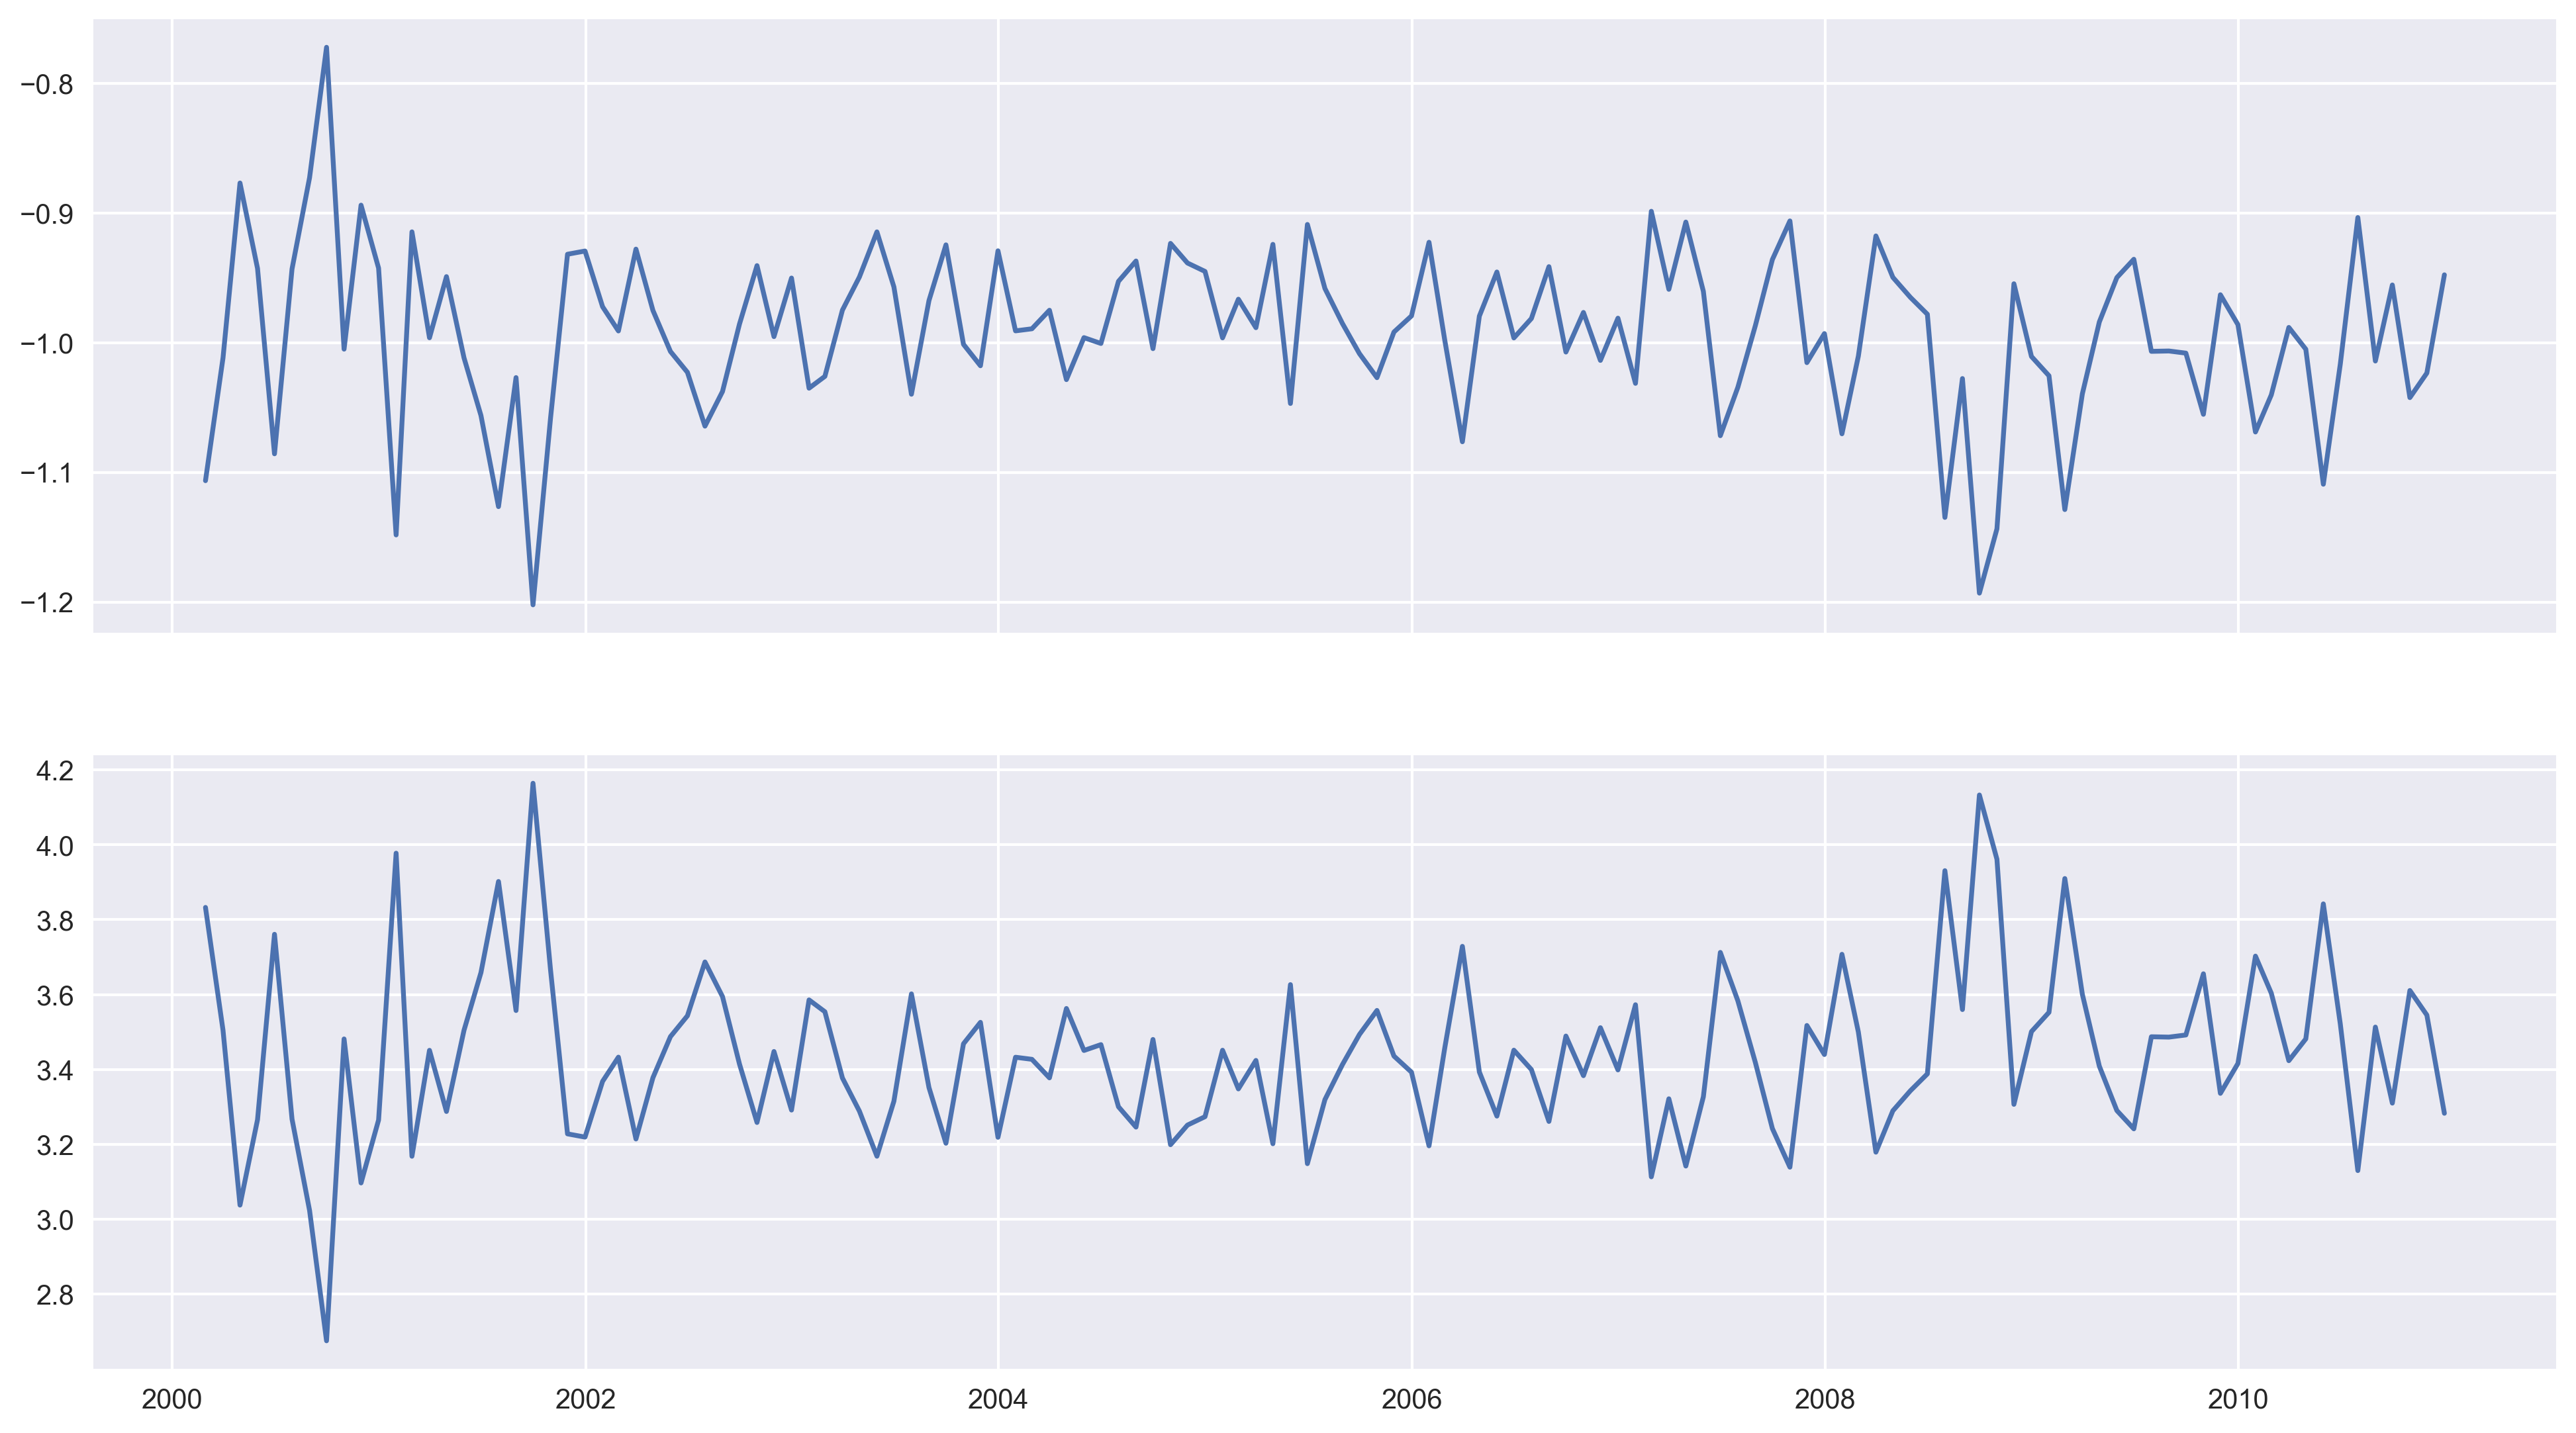

In [72]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(df_ret[1:])
ax[1].plot(df_rv[1:])

## Visualizing time series data

In [81]:
df = yf.download('EXC',
                start = '2000-01-01',
                end = '2010-12-31',
                progress = False)

df = df.loc[:, ['Adj Close']]
df.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

In [82]:
df.head()

adj_close  simple_rtn   log_rtn
Date                                       
2000-01-03       7.80         NaN       NaN
2000-01-04       7.74   -0.007692 -0.007722
2000-01-05       8.11    0.047804  0.046696
2000-01-06       8.13    0.002466  0.002463
2000-01-07       8.13    0.000000  0.000000

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Log Return')]

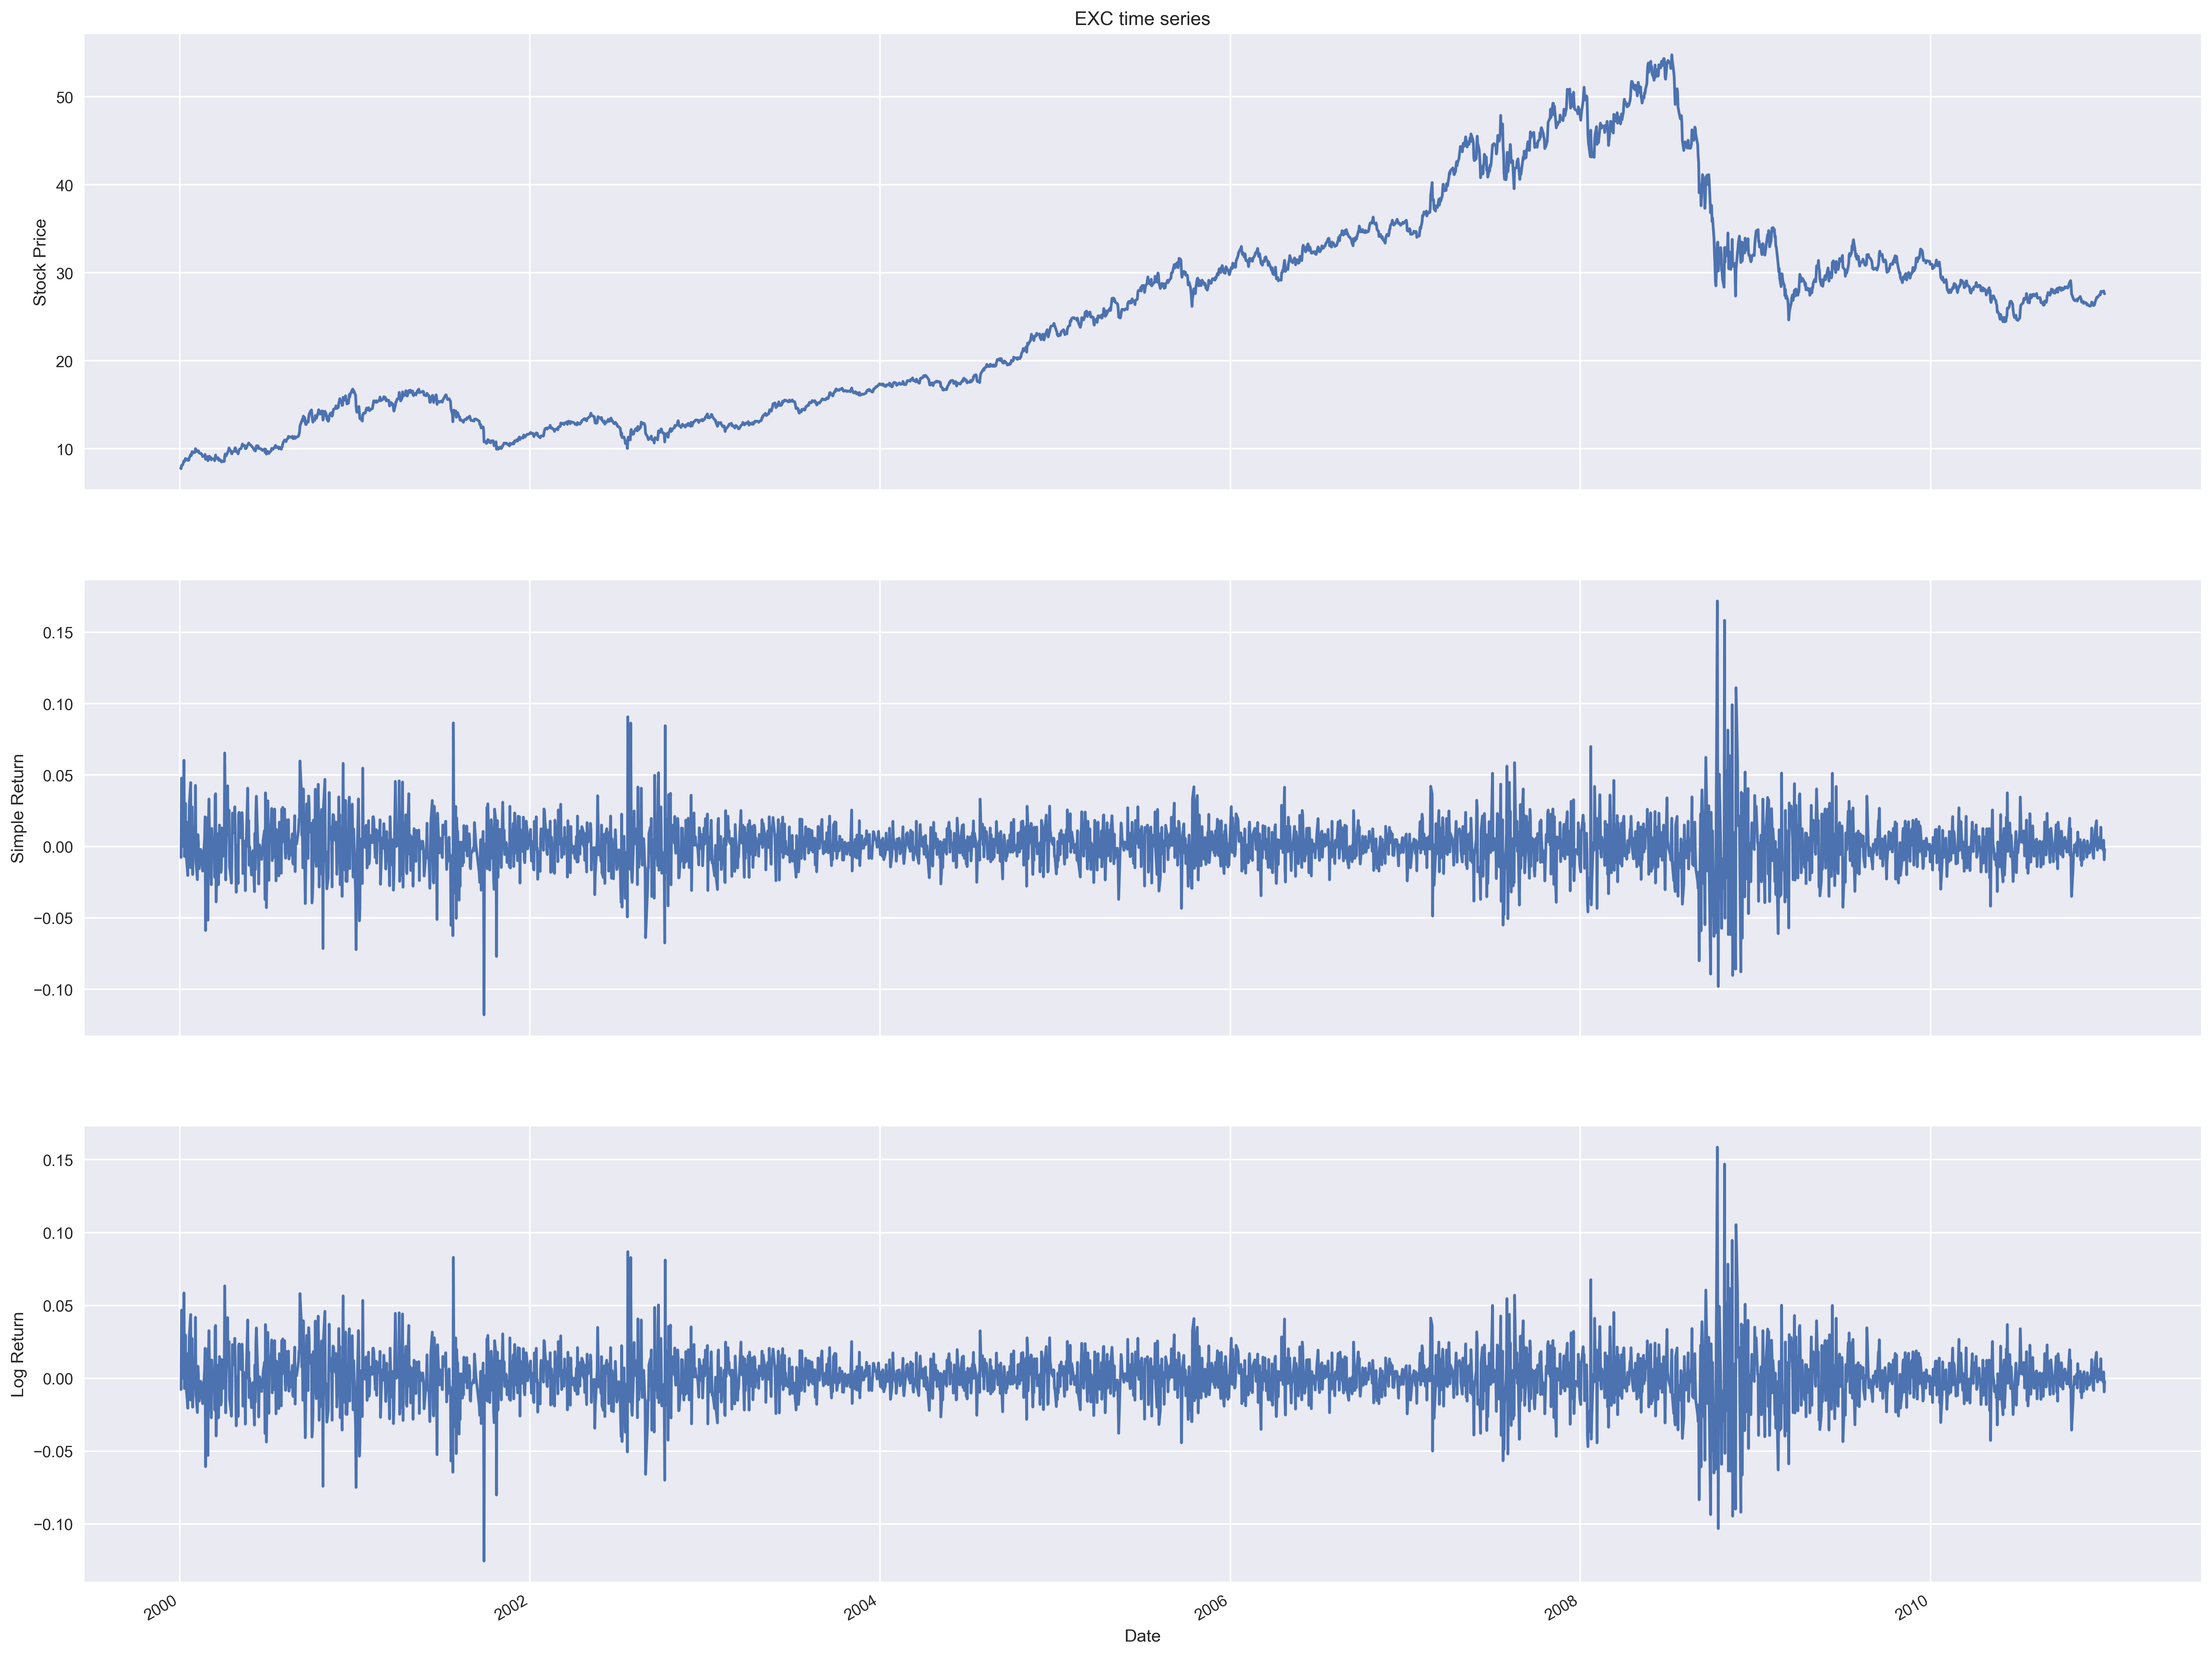

In [84]:
fig, ax = plt.subplots(3, 1, figsize=(24, 20), sharex=True)
df.adj_close.plot(ax=ax[0])
ax[0].set(title='EXC time series',
         ylabel = 'Stock Price')

df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple Return')

df.log_rtn.plot(ax = ax[2])
ax[2].set(xlabel = 'Date',
         ylabel = 'Log Return')

## plotly and cufflinks

In [86]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

# set up settings (run it once)
# cf.set_config_file(world_readable=True, theme='pearl', 
#                    offline=True)

# initialize notebook display
init_notebook_mode()

In [ ]:
df.iplot(subplots=True, shape=(3,1), shared_xaxes=True, title='EXC time series')


## Identifying Outliers

In [90]:
df.head()

adj_close  simple_rtn   log_rtn
Date                                       
2000-01-03       7.80         NaN       NaN
2000-01-04       7.74   -0.007692 -0.007722
2000-01-05       8.11    0.047804  0.046696
2000-01-06       8.13    0.002466  0.002463
2000-01-07       8.13    0.000000  0.000000

In [98]:
df_rolling = df[['simple_rtn']].rolling(window=21).agg(['mean', 'std'])

In [99]:
df_rolling.columns = df_rolling.columns.droplevel()
df_rolling.tail()

mean       std
Date                          
2010-12-23  0.002730  0.006781
2010-12-27  0.002430  0.006871
2010-12-28  0.002869  0.006670
2010-12-29  0.002625  0.007025
2010-12-30  0.002522  0.007081

In [100]:
df_outliers = df.join(df_rolling)
df_outliers.tail()

adj_close  simple_rtn   log_rtn      mean       std
Date                                                           
2010-12-23      27.89    0.000718  0.000717  0.002730  0.006781
2010-12-27      27.82   -0.002510 -0.002513  0.002430  0.006871
2010-12-28      27.94    0.004313  0.004304  0.002869  0.006670
2010-12-29      27.68   -0.009306 -0.009349  0.002625  0.007025
2010-12-30      27.62   -0.002168 -0.002170  0.002522  0.007081

In [105]:
def indentify_outliers(row, n_sigmas = 3):
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    if (x>mu+3*sigma) | (x<mu-3*sigma):
        return 1
    else:
        return 0    

In [106]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, axis=1)
df_outliers.tail()

adj_close  simple_rtn   log_rtn      mean       std  outlier
Date                                                                    
2010-12-23      27.89    0.000718  0.000717  0.002730  0.006781        0
2010-12-27      27.82   -0.002510 -0.002513  0.002430  0.006871        0
2010-12-28      27.94    0.004313  0.004304  0.002869  0.006670        0
2010-12-29      27.68   -0.009306 -0.009349  0.002625  0.007025        0
2010-12-30      27.62   -0.002168 -0.002170  0.002522  0.007081        0

In [107]:
outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['simple_rtn']]
outliers

simple_rtn
Date                  
2000-09-08    0.059815
2001-07-25    0.086458
2001-09-27   -0.117840
2002-07-24    0.090728
2003-11-03    0.025485
2005-09-21   -0.043326
2008-09-05   -0.080000
2008-10-13    0.171809

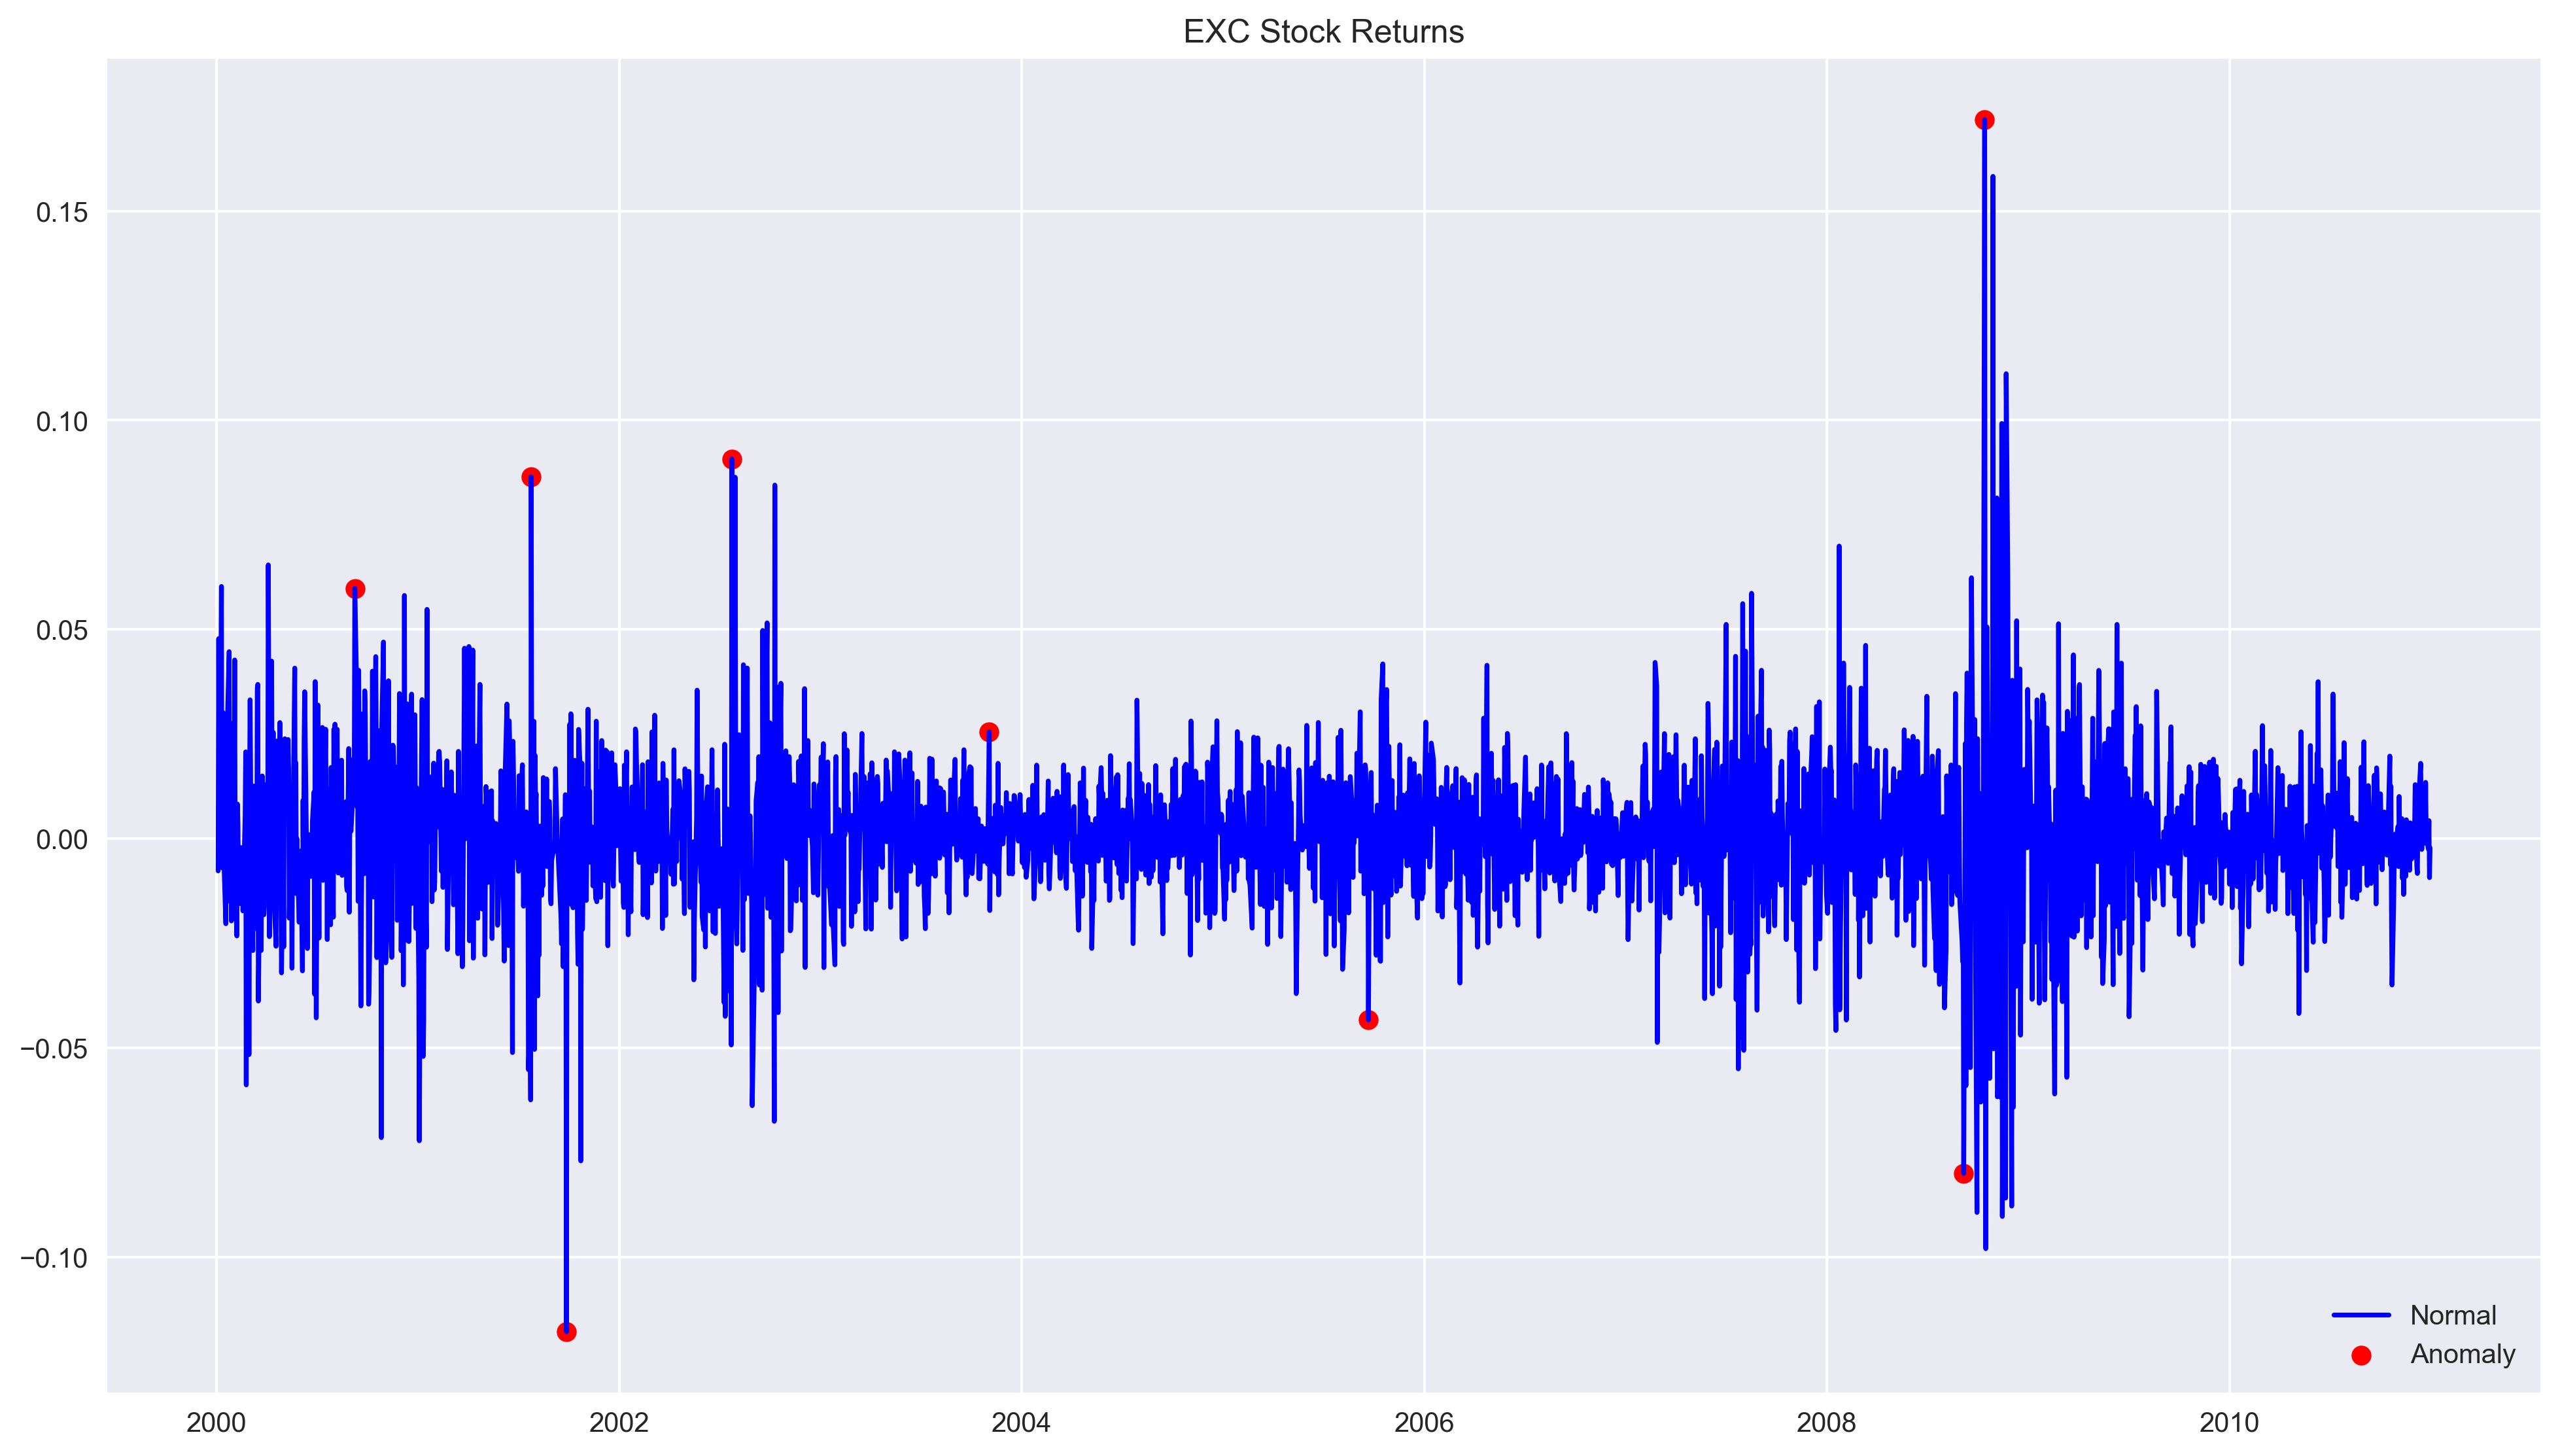

In [108]:
fig, ax = plt.subplots()
ax.plot(df_outliers.index, df_outliers.simple_rtn, color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, color='red', label='Anomaly')
ax.set_title('EXC Stock Returns')
ax.legend(loc='lower right')

## Investigating stylized facts of asset returns

In [121]:
df.dropna(inplace=True)
df.head()

adj_close  simple_rtn   log_rtn
Date                                       
2000-01-04       7.74   -0.007692 -0.007722
2000-01-05       8.11    0.047804  0.046696
2000-01-06       8.13    0.002466  0.002463
2000-01-07       8.13    0.000000  0.000000
2000-01-10       8.62    0.060271  0.058524

In [122]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale = sigma)

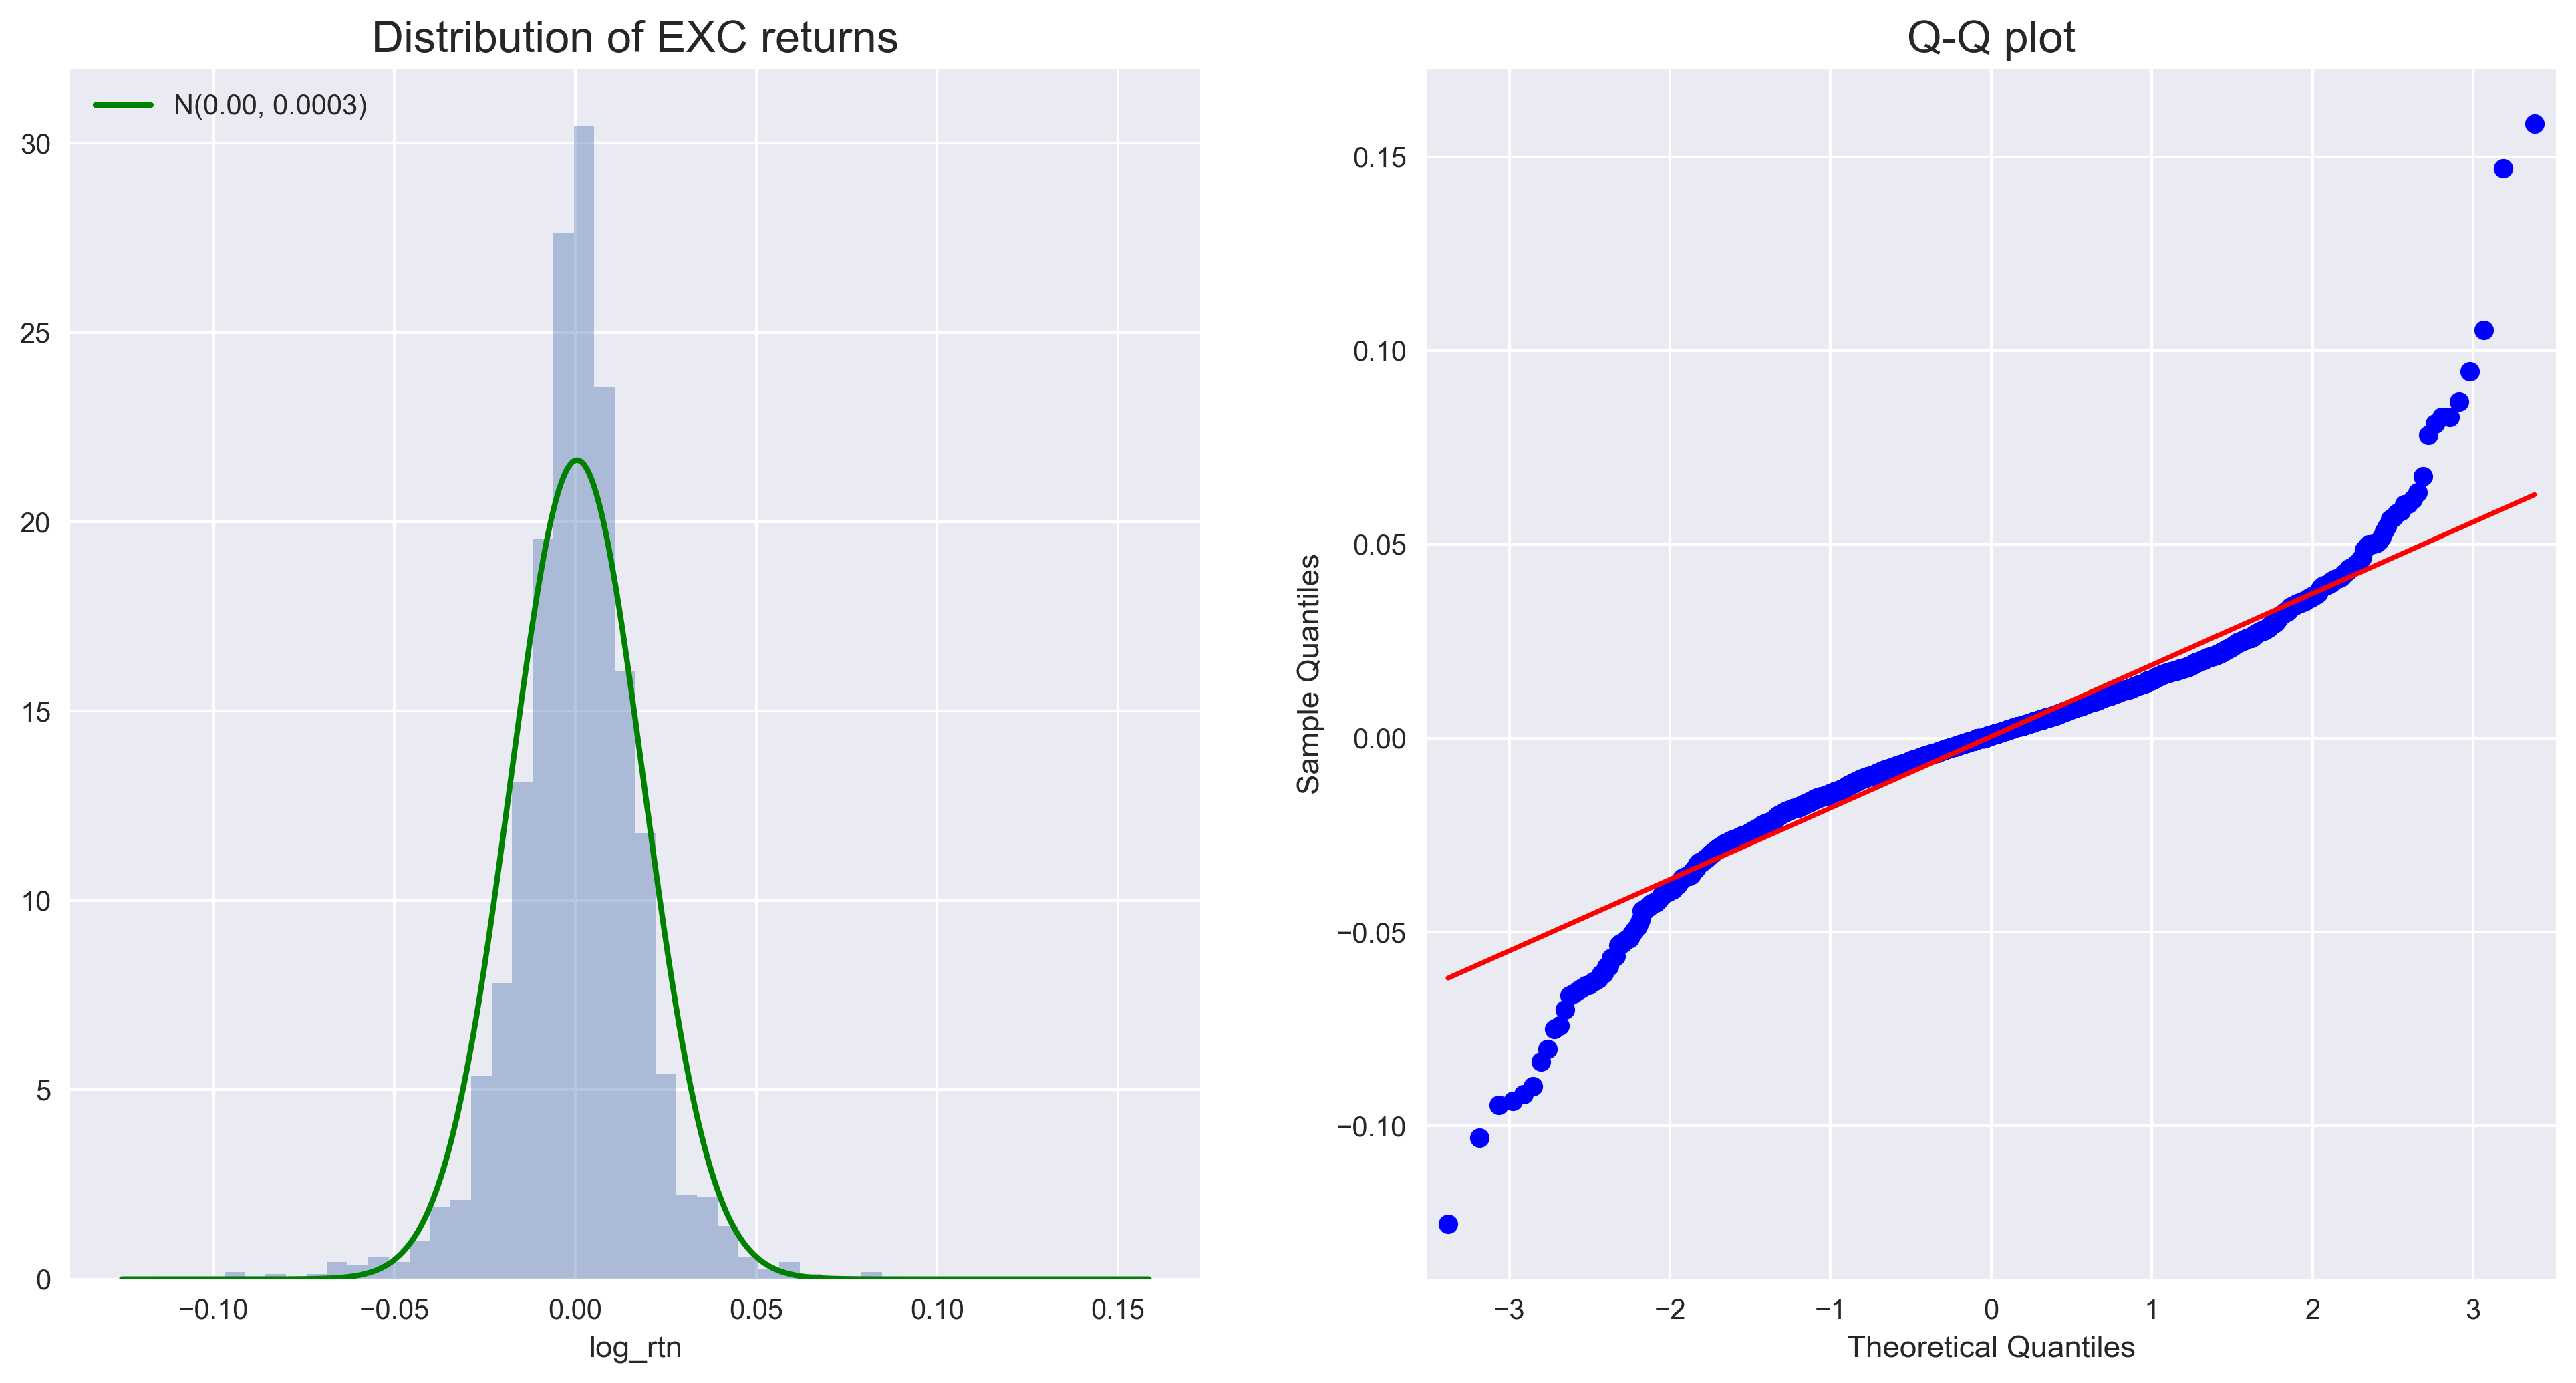

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of EXC returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

In [129]:
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 2000-01-04 - 2010-12-30
Number of observations: 2765
Mean: 0.0005
Median: 0.0008
Min: -0.1254
Max: 0.1585
Standard Deviation: 0.0184
Skewness: 0.0462
Kurtosis: 7.3965
Jarque-Bera statistic: 6277.39 with p-value: 0.00


## Volatility clustering

In [131]:
df.head(3)

adj_close  simple_rtn   log_rtn
Date                                       
2000-01-04       7.74   -0.007692 -0.007722
2000-01-05       8.11    0.047804  0.046696
2000-01-06       8.13    0.002466  0.002463

<AxesSubplot:title={'center':'EXC Daily Return'}, xlabel='Date'>

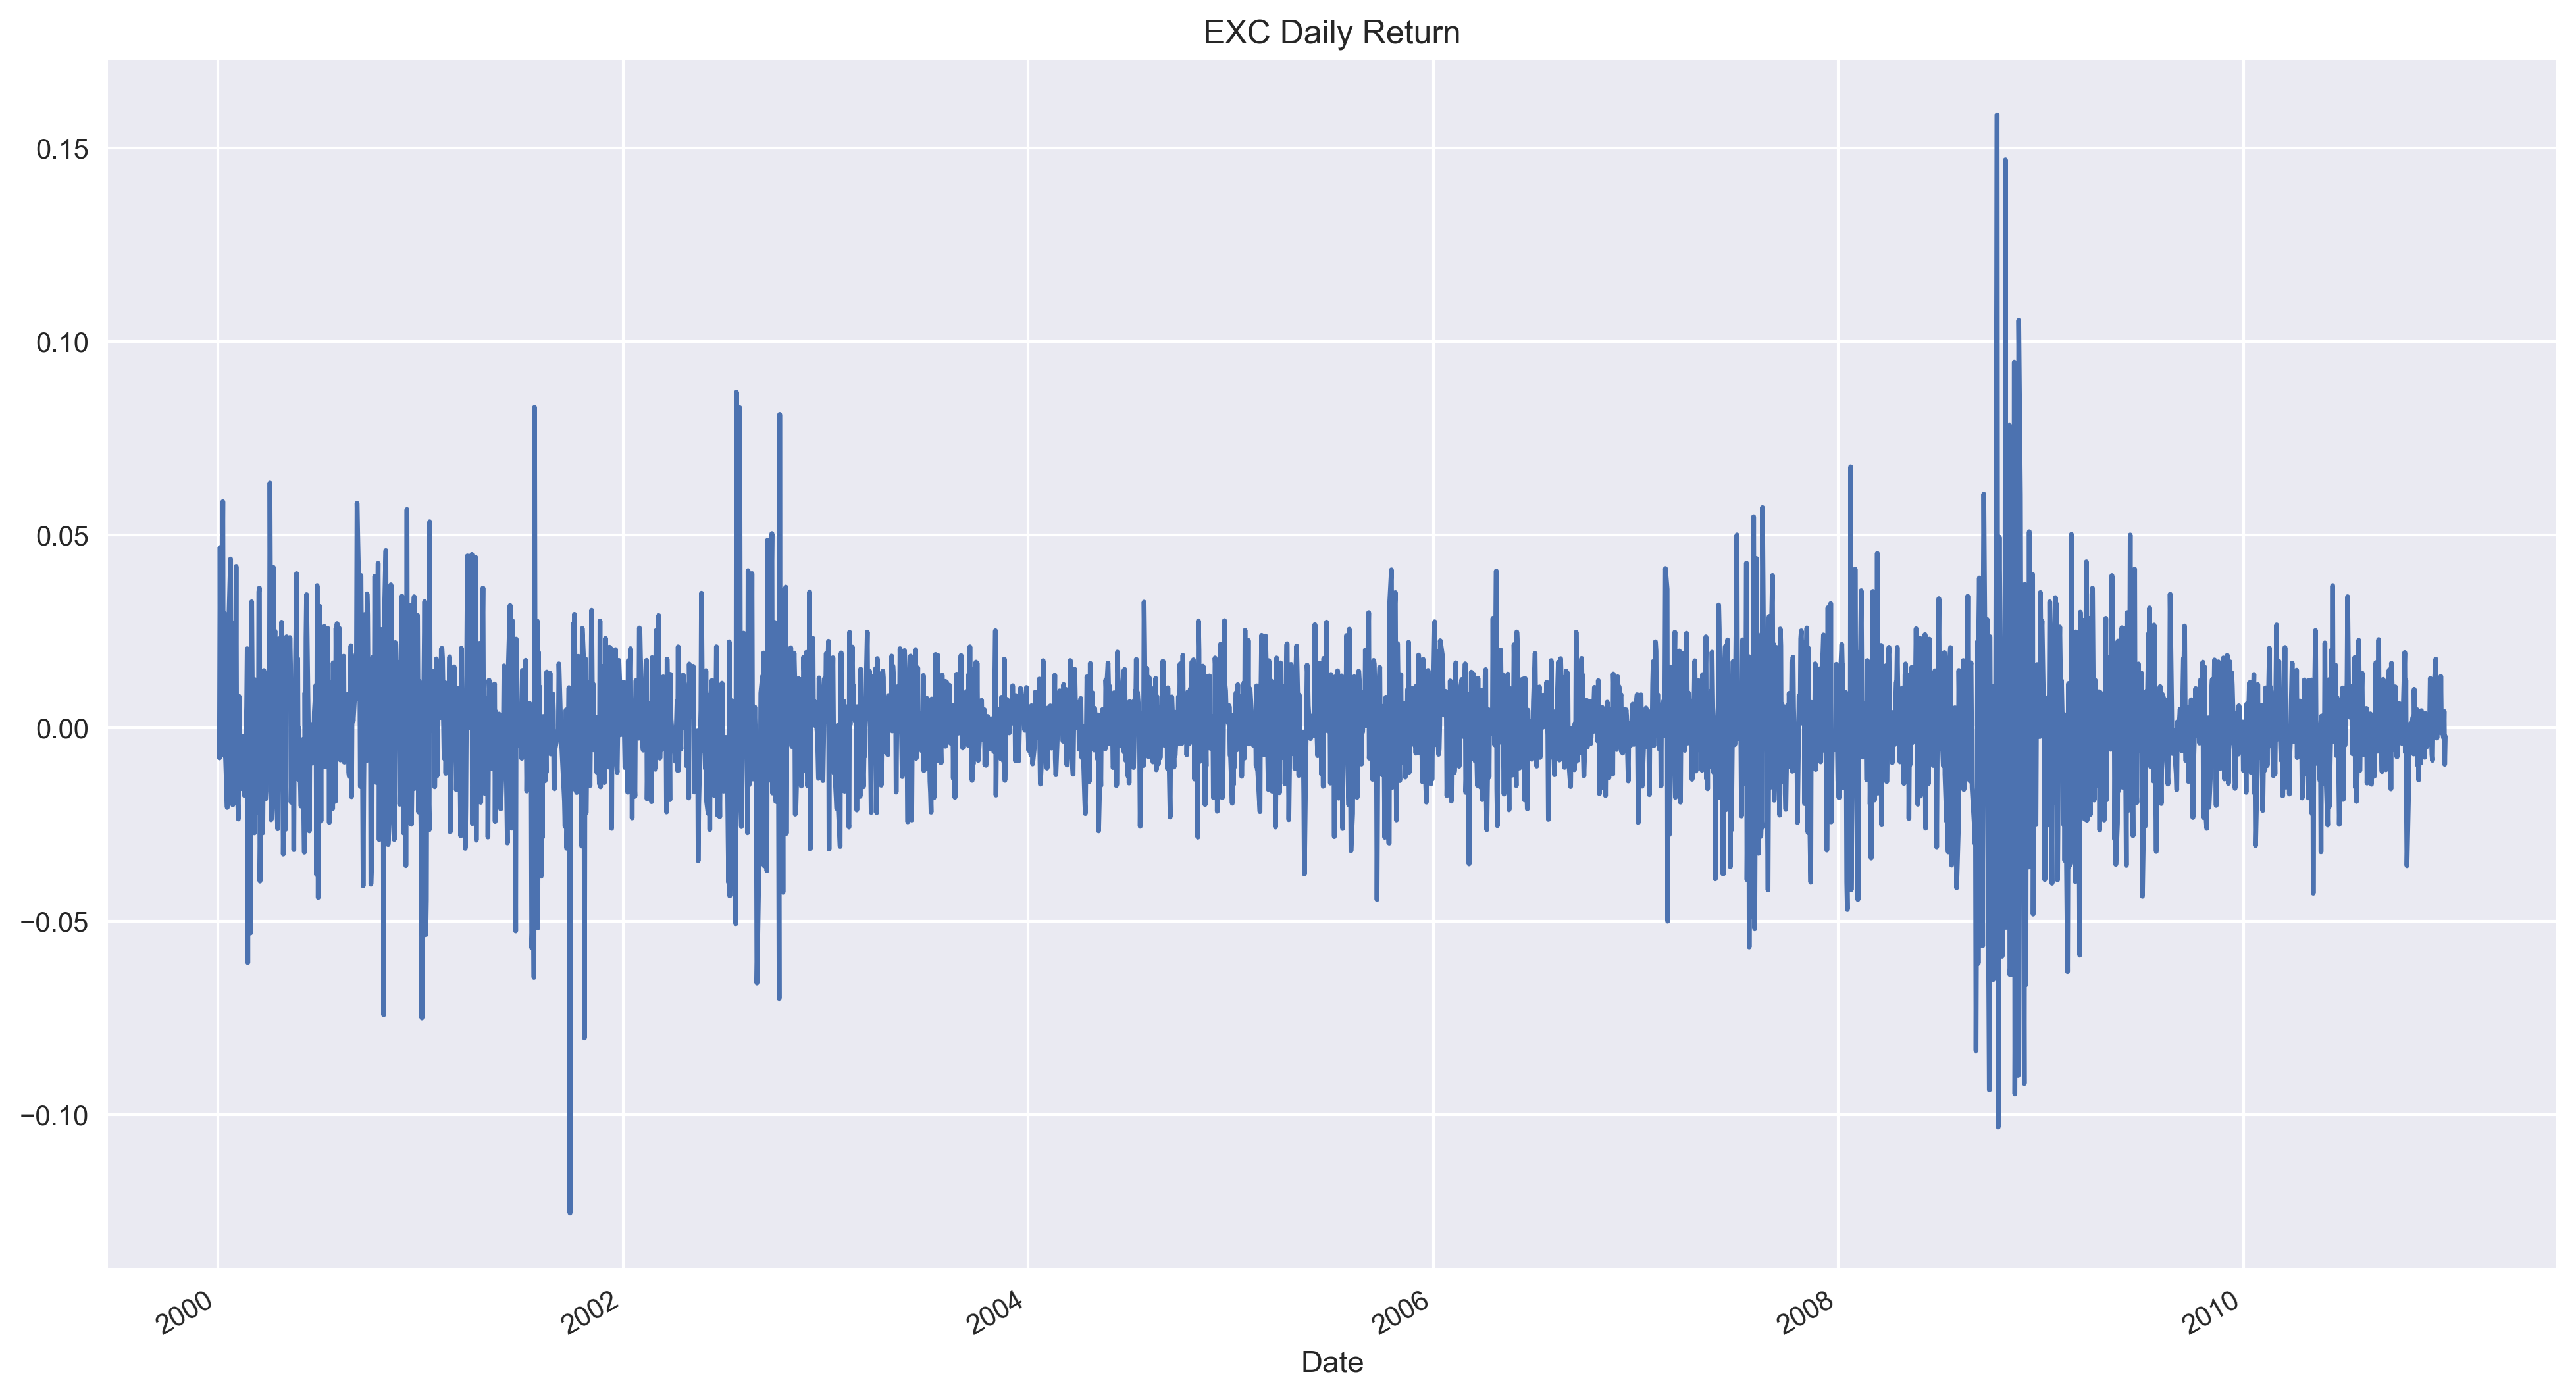

In [132]:
df.log_rtn.plot(title='EXC Daily Return')

## Absence of autocorrelation in returns

In [133]:
n_lags = 50
significane_level = 0.05

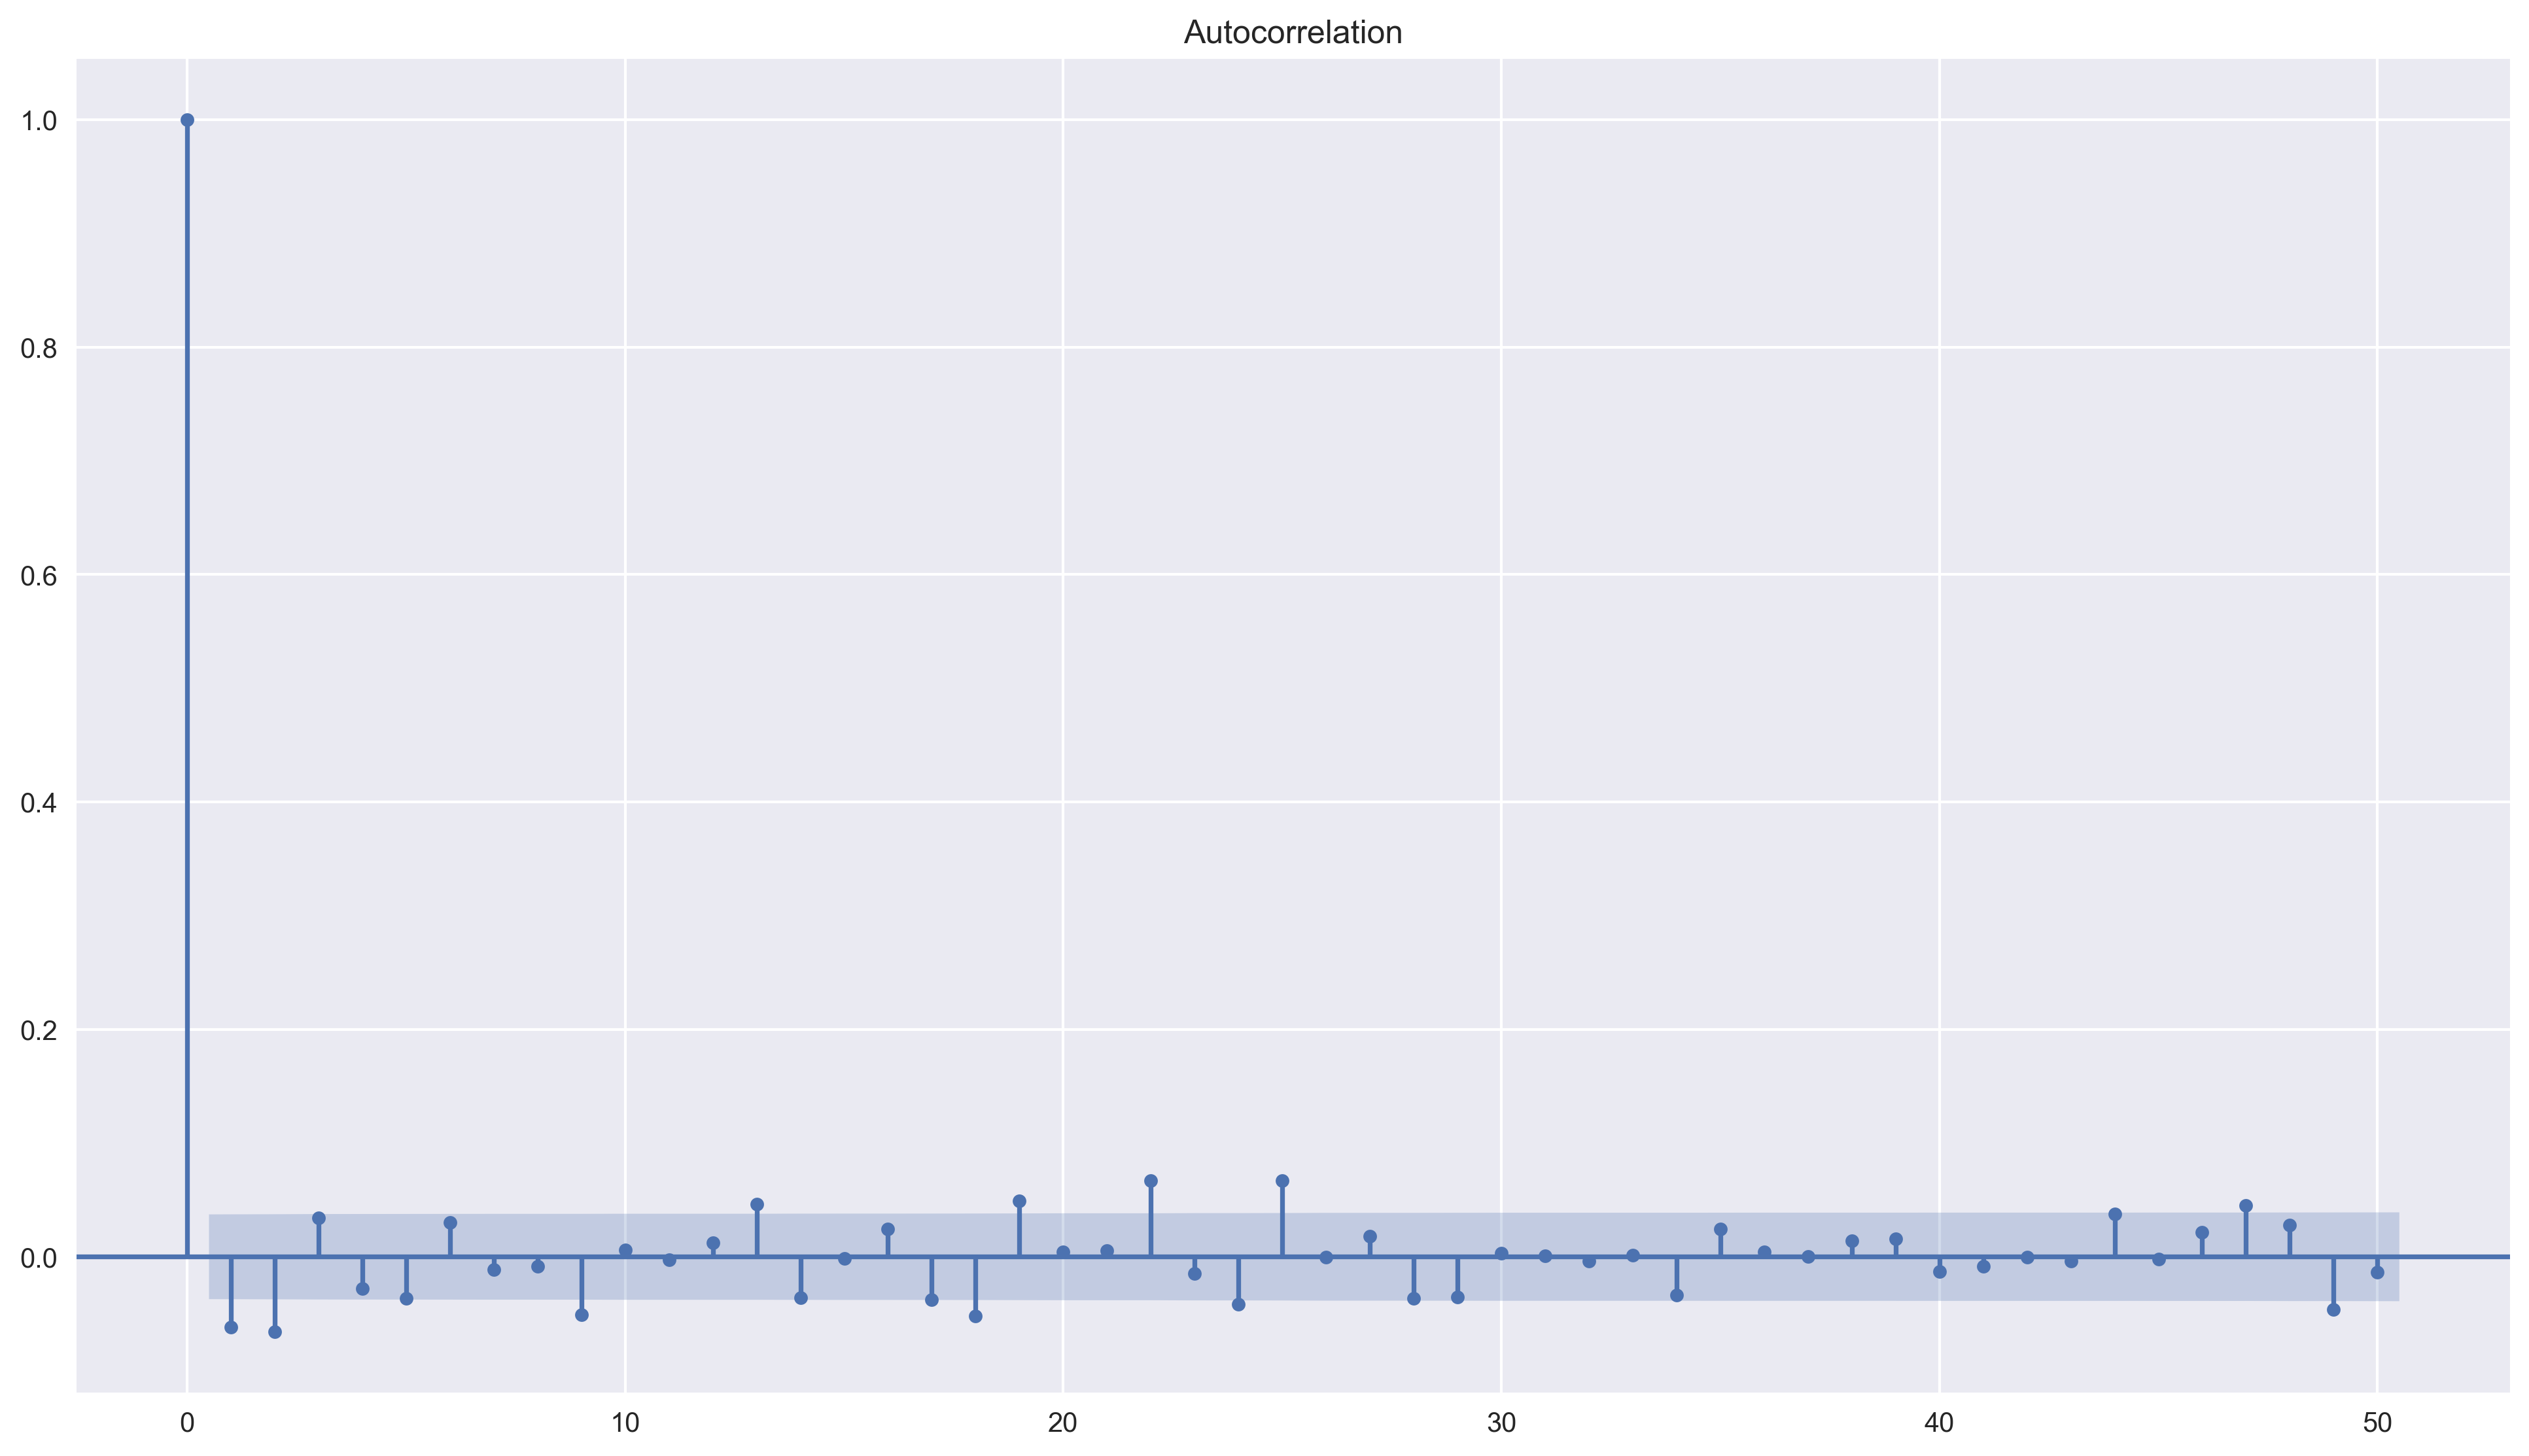

In [135]:
acf = smt.graphics.plot_acf(df.log_rtn, 
                           lags = n_lags,
                           alpha = significane_level)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag'), Text(0.5, 1.0, '')]

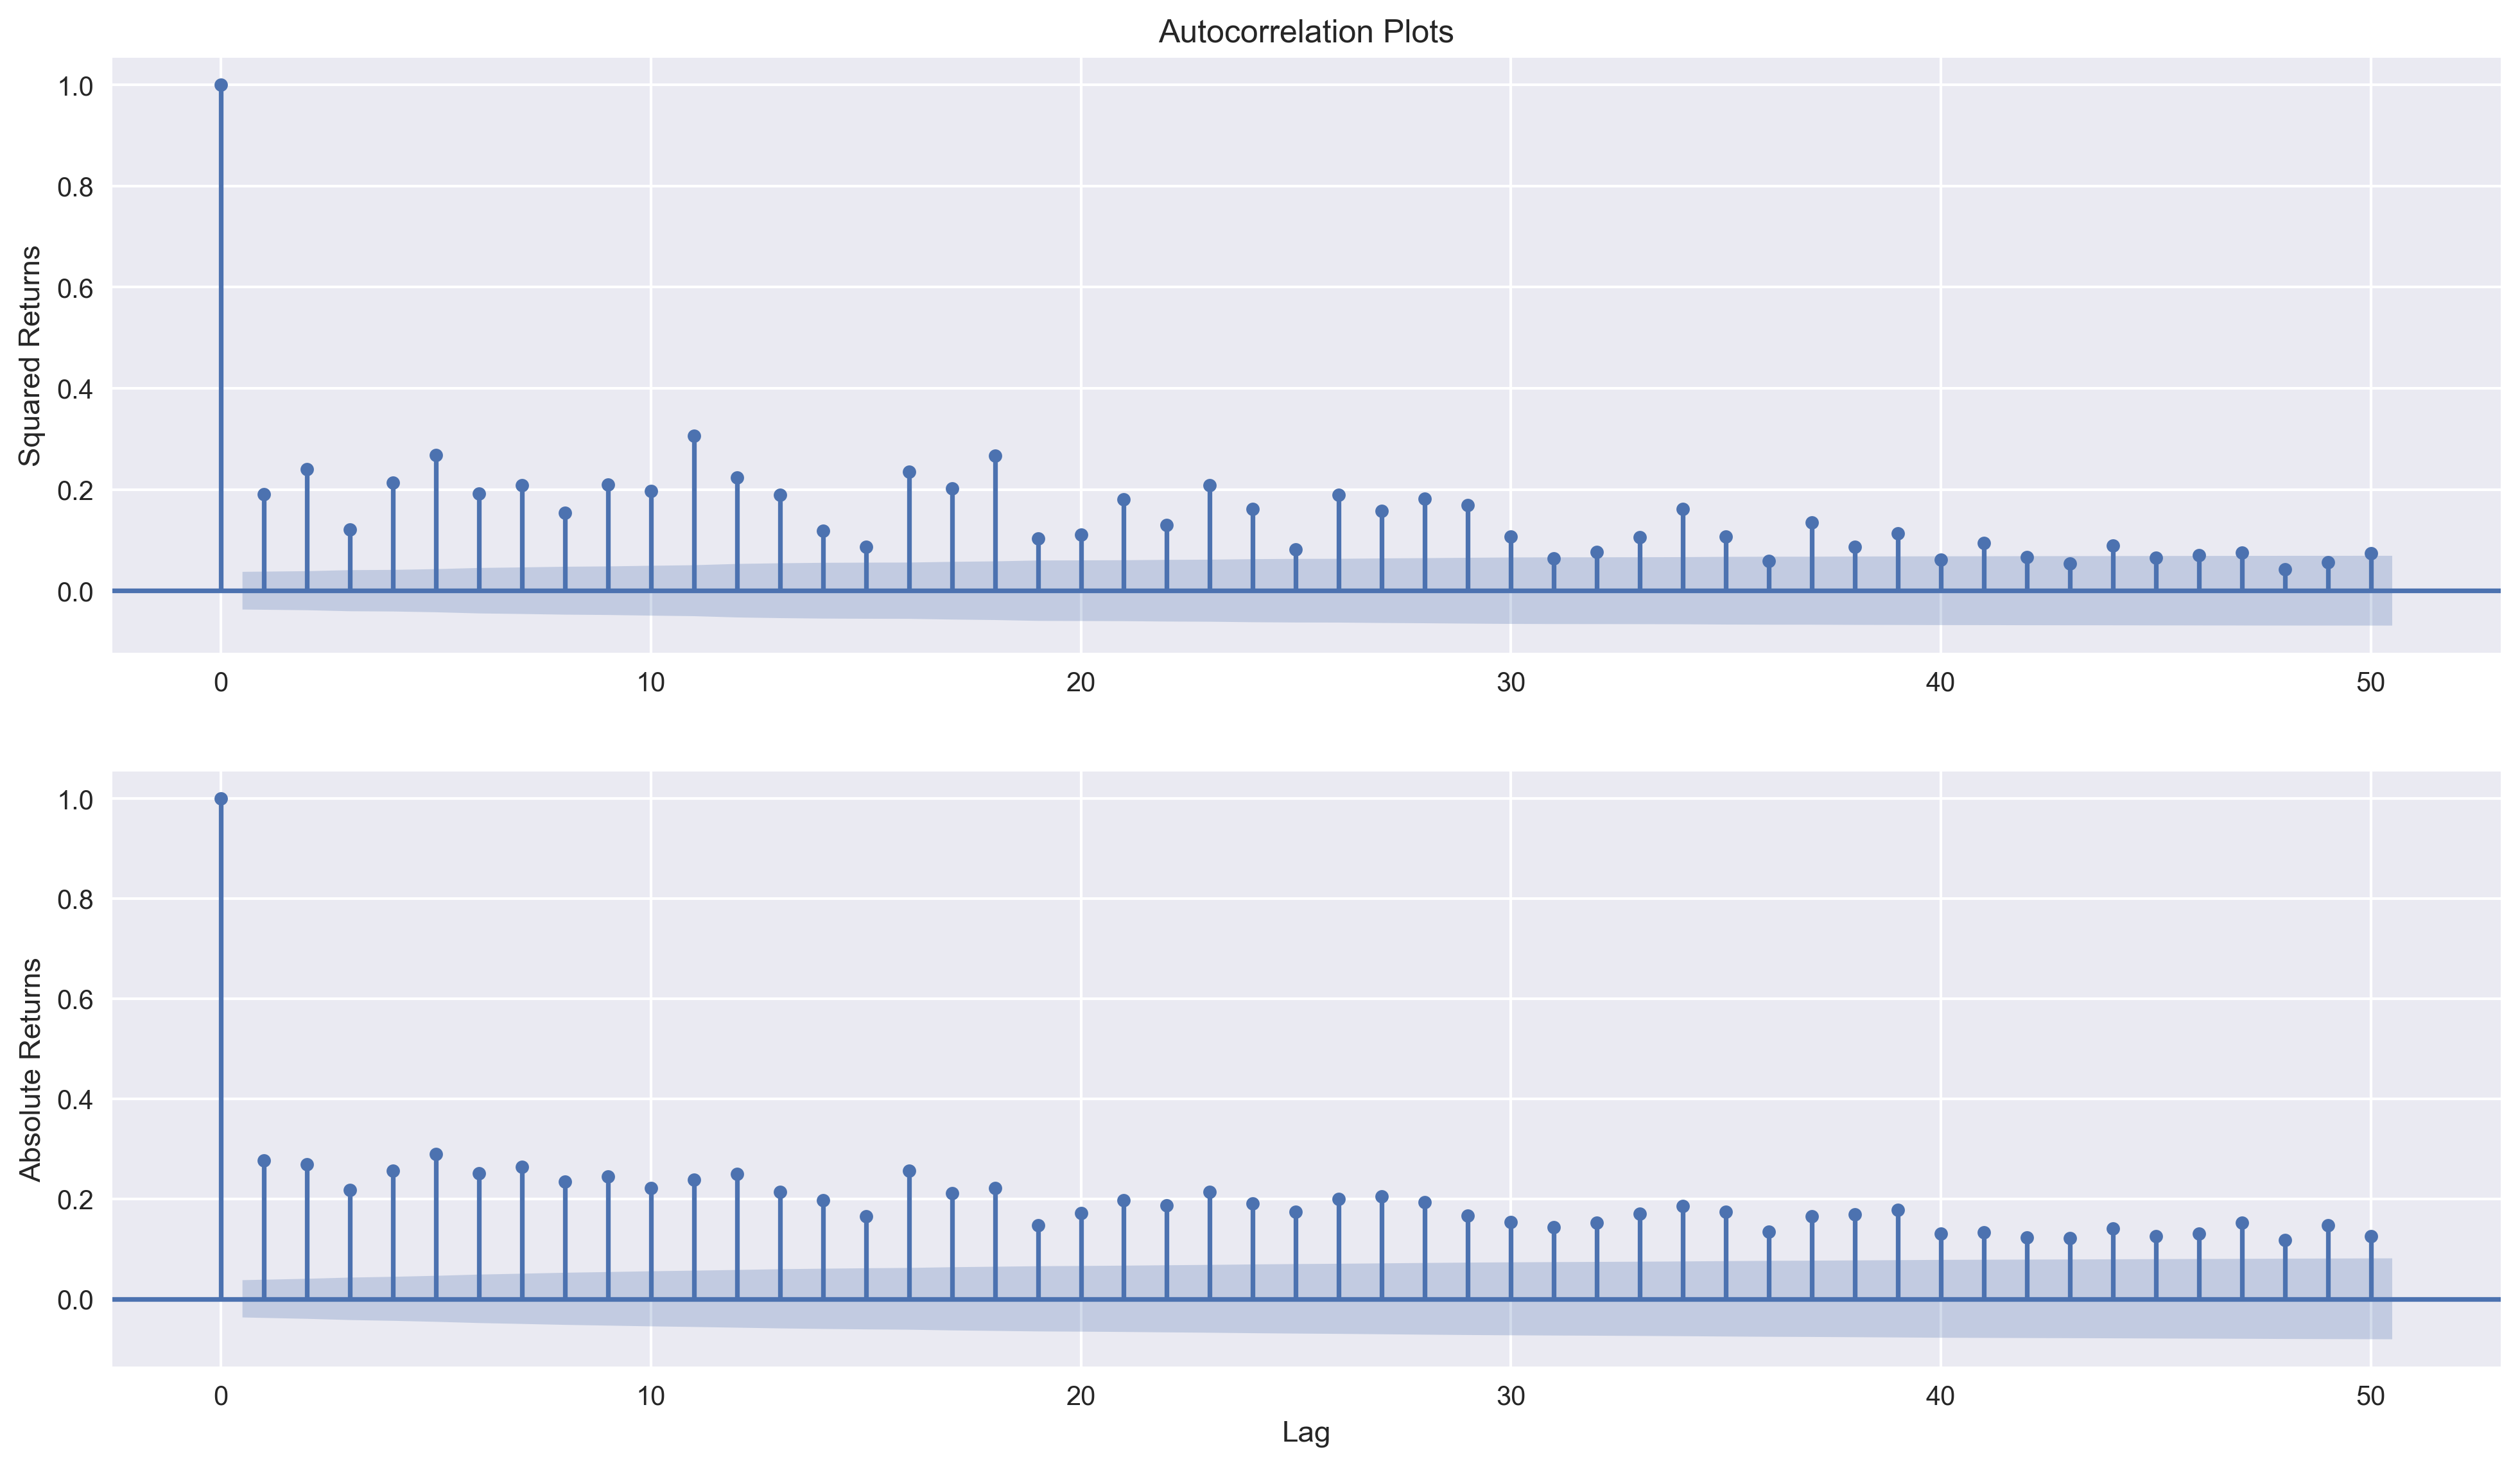

In [140]:
fig, ax = plt.subplots(2, 1)
smt.graphics.plot_acf(df.log_rtn**2, lags = n_lags,
                           alpha = significane_level, ax = ax[0])
ax[0].set(title = 'Autocorrelation Plots', ylabel='Squared Returns')

smt.graphics.plot_acf(np.abs(df.log_rtn), lags = n_lags,
                           alpha = significane_level, ax = ax[1])
ax[1].set( ylabel='Absolute Returns', xlabel='Lag', title=None)

## Leverage Effect

In [141]:
df.head(3)

adj_close  simple_rtn   log_rtn
Date                                       
2000-01-04       7.74   -0.007692 -0.007722
2000-01-05       8.11    0.047804  0.046696
2000-01-06       8.13    0.002466  0.002463

In [142]:
df['movig_std_252'] = df.log_rtn.rolling(window=252).std()
df['movig_std_21'] = df.log_rtn.rolling(window=21).std()
df.tail(3)

adj_close  simple_rtn   log_rtn  movig_std_252  movig_std_21
Date                                                                    
2010-12-28      27.94    0.004313  0.004304       0.011355      0.006639
2010-12-29      27.68   -0.009306 -0.009349       0.011368      0.006998
2010-12-30      27.62   -0.002168 -0.002170       0.011368      0.007054

[Text(0, 0.5, 'Rolling STD')]

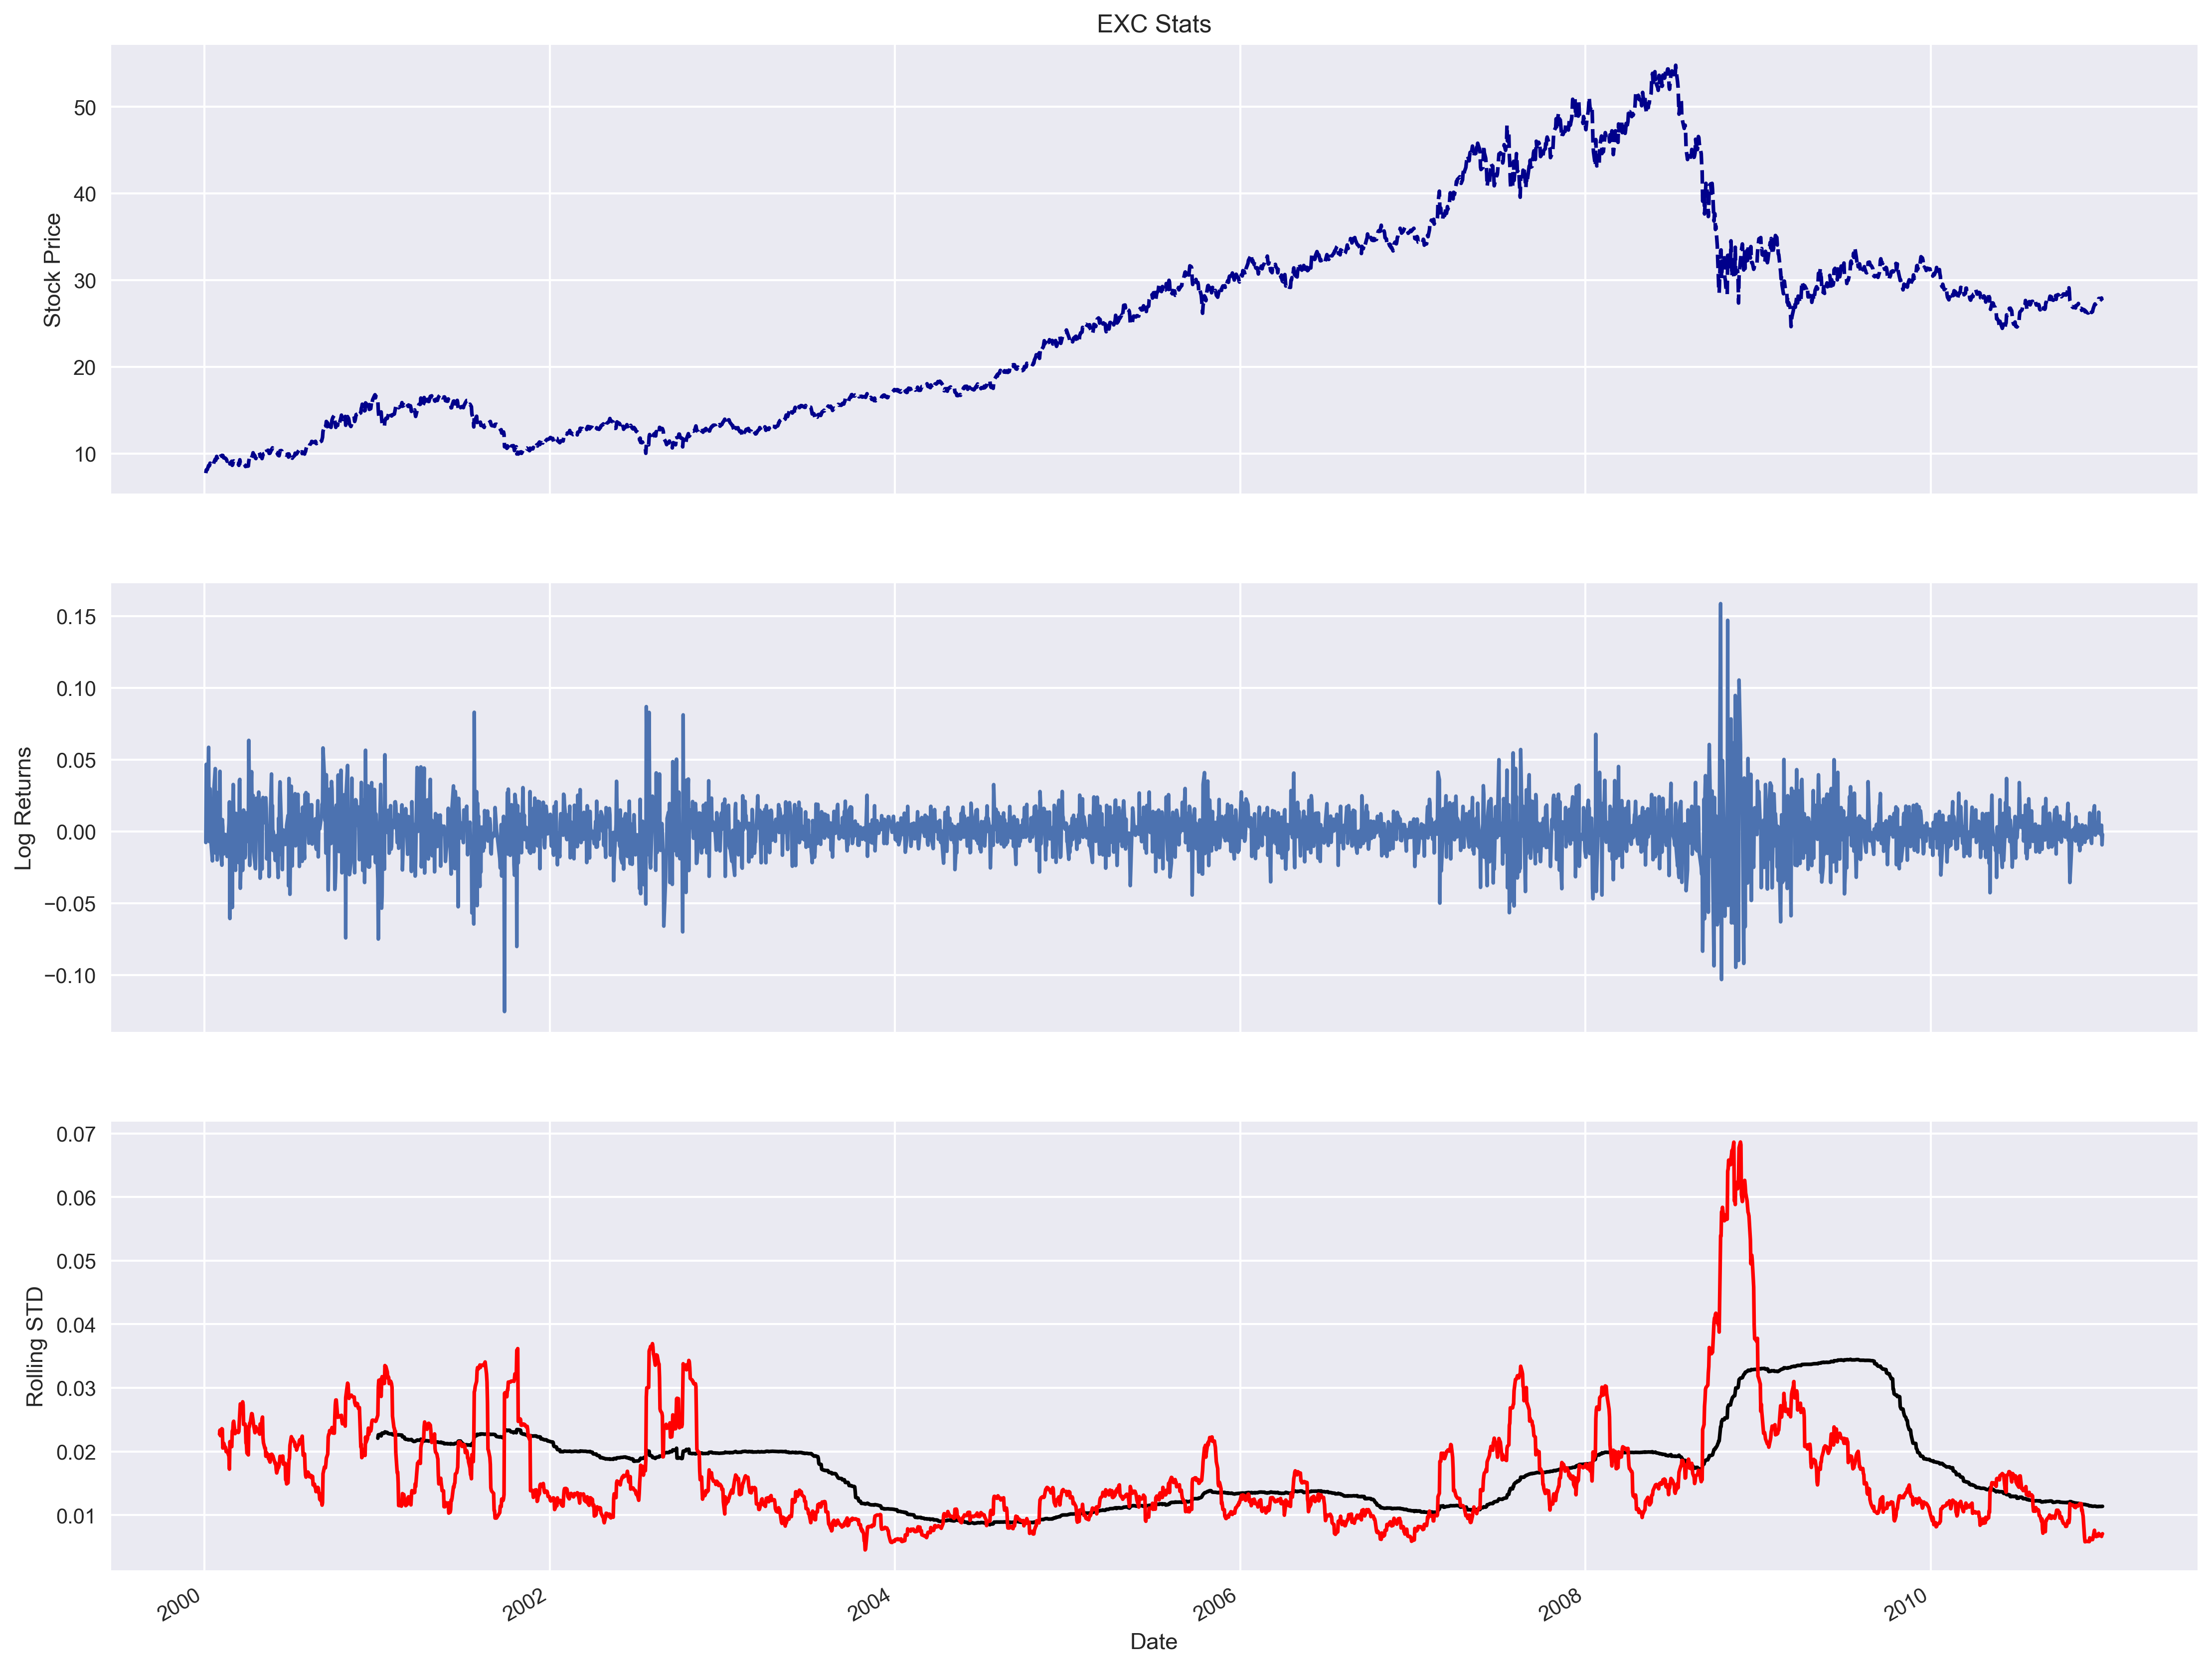

In [152]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(18,15))
df.adj_close.plot(ax=ax[0],c='darkblue', ls='--')
ax[0].set(ylabel='Stock Price', title='EXC Stats')

df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log Returns')

df.movig_std_252.plot(ax=ax[2], color ='black')
df.movig_std_21.plot(ax=ax[2], color='red')
ax[2].set(ylabel='Rolling STD')

## SP500 vs. VIX ==> Not Normal Returns

In [154]:
df = yf.download(['^GSPC', '^VIX'], start = '2000-01-01', end = '2020-11-16')
df.head(3)

[*********************100%***********************]  2 of 2 downloaded


Adj Close           Close            High             Low         \
               ^GSPC   ^VIX    ^GSPC   ^VIX    ^GSPC   ^VIX    ^GSPC   ^VIX   
Date                                                                          
2000-01-03   1455.22  24.21  1455.22  24.21  1478.00  26.15  1438.36  23.98   
2000-01-04   1399.42  27.01  1399.42  27.01  1455.22  27.18  1397.43  24.80   
2000-01-05   1402.11  26.41  1402.11  26.41  1413.27  29.00  1377.68  25.85   

               Open             Volume       
              ^GSPC   ^VIX       ^GSPC ^VIX  
Date                                         
2000-01-03  1469.25  24.36   931800000    0  
2000-01-04  1455.22  24.94  1009000000    0  
2000-01-05  1399.42  27.98  1085500000    0

In [155]:
df = df['Adj Close']
df.head(3)

^GSPC   ^VIX
Date                      
2000-01-03  1455.22  24.21
2000-01-04  1399.42  27.01
2000-01-05  1402.11  26.41

In [156]:
df.columns = ['sp500', 'vix']
df.head(3)

sp500    vix
Date                      
2000-01-03  1455.22  24.21
2000-01-04  1399.42  27.01
2000-01-05  1402.11  26.41

In [157]:
df['log_rets'] = np.log(df.sp500 / df.sp500.shift(1))
df['vix_rets'] = np.log(df.vix / df.vix.shift(1))
df.head(3)

sp500    vix  log_rets  vix_rets
Date                                          
2000-01-03  1455.22  24.21       NaN       NaN
2000-01-04  1399.42  27.01 -0.039099  0.109441
2000-01-05  1402.11  26.41  0.001920 -0.022464

In [158]:
df.dropna(inplace=True)

In [159]:
corr_coef = df.log_rets.corr(df.vix_rets)
corr_coef

-0.7292742799209545

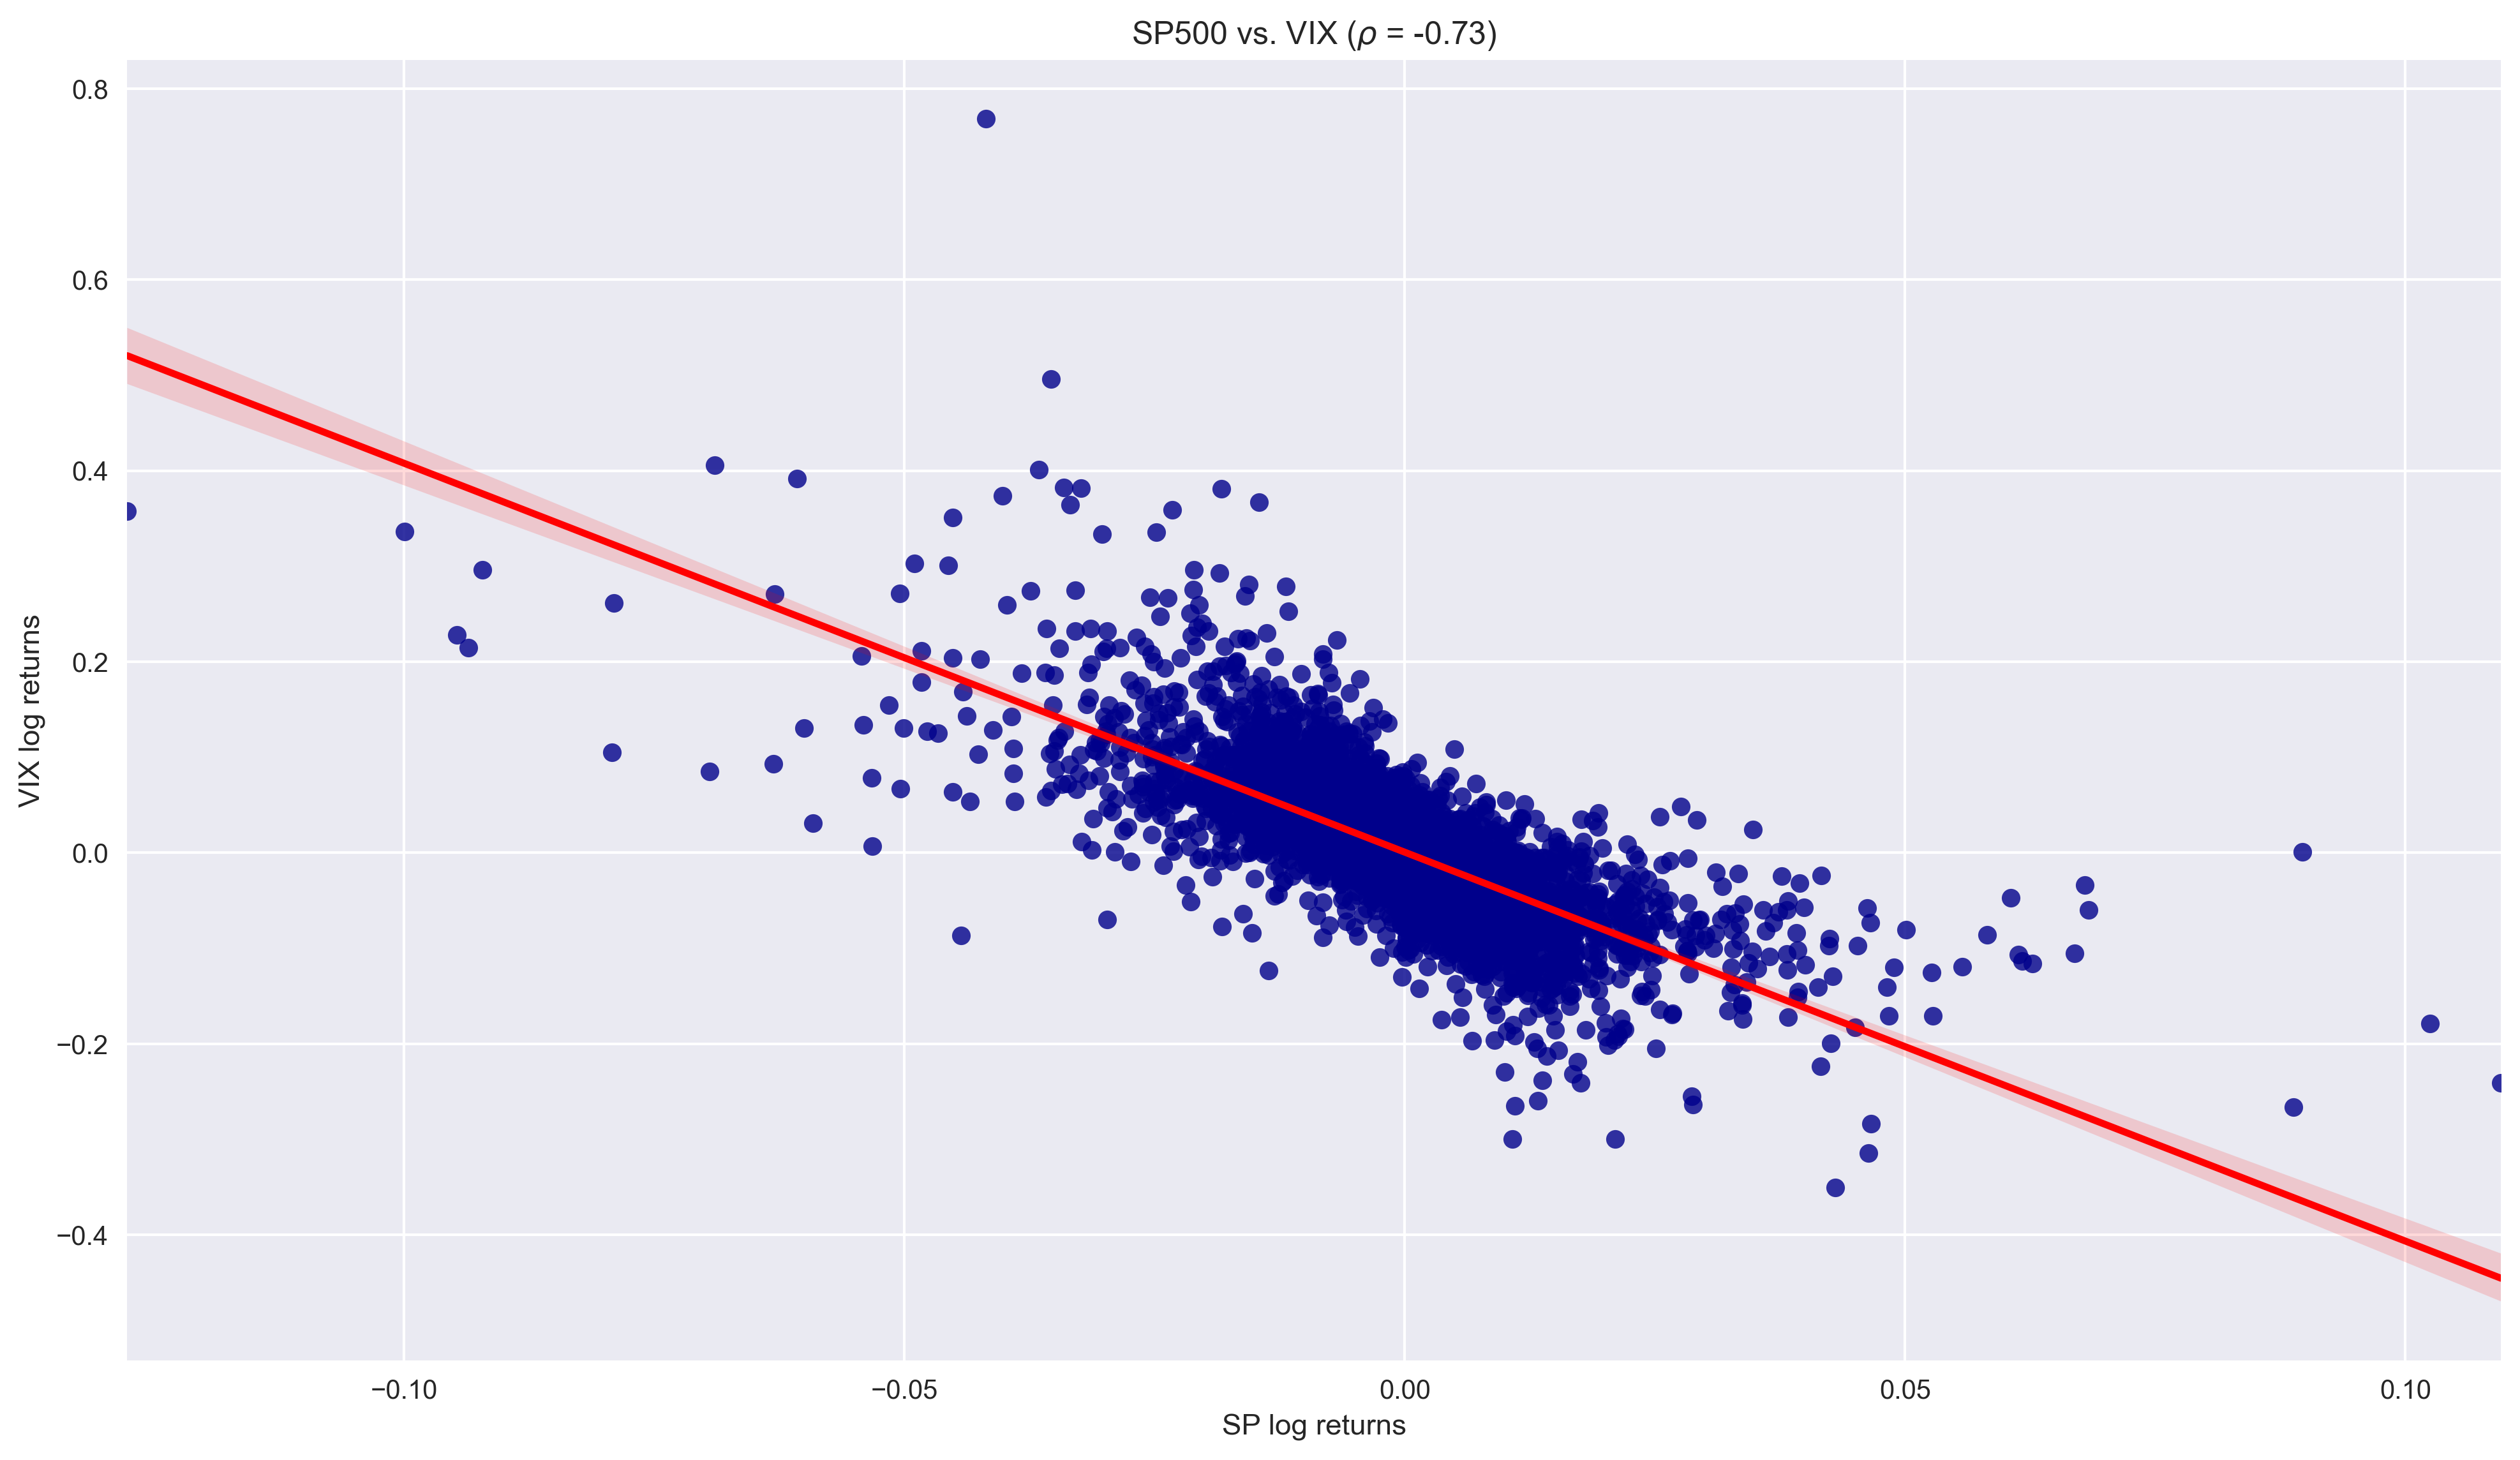

In [162]:
ax = sns.regplot(x=df.log_rets, y = df.vix_rets, data= df,line_kws={'color':'red'} , color = 'darkblue')
ax.set(title = f"SP500 vs. VIX ($\\rho$ = {corr_coef:.2f})",
      ylabel = 'VIX log returns',
      xlabel = 'SP log returns');